In [1]:
%run ./DataGen2.ipynb

In [2]:
class Standard_Param():
    def __init__(self):
        # Region of interest :
        self.x_lim = [0, 4] # micrometer
        self.y_lim = [0, 4]

        # Clusters :
        self.NumberOfClusters = 40
        self.LocPerCluster    = [24] * self.NumberOfClusters
        self.r                = [30] * self.NumberOfClusters # nm
        self.cluster_shape    = 'uniform'

        # Noise :
        self.NoisePercentage  = 0.5 # between 0 adnd 0.8
        self.UniformNoise     = True 
        
        # SMLM points : 
        self.mean_uncertainty      = 20
        self.dev_uncertainty       = 3
        self.N_photons             = 150
        
        # Scales : 
        self.NumberOfScales   = 1

In [3]:
def Call_DataGenerator(p):
    datagen = DataGenerator(x_lim = p.x_lim,
                        y_lim = p.y_lim,
                        NumberOfClusters = p.NumberOfClusters,
                        LocPerCluster = p.LocPerCluster,
                        r = p.r,
                        NoisePercentage = p.NoisePercentage,
                        NumberOfScales = p.NumberOfScales,
                        #delta = p.delta,
                        cluster_shape = p.cluster_shape,
                        UniformNoise = p.UniformNoise, 
                        mean_delta = p.mean_uncertainty, 
                        dev_delta = p.dev_uncertainty,
                        N_photons = p.N_photons)
    return datagen

In [4]:
def compute_T(N, sigma_s = 40.0, x_lim = [0,4], y_lim = [0,4]):
    csr = CsrGenerator(N=N, x_lim = x_lim, y_lim = y_lim)
    data = csr.GetAllData()
    P = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
    truelabels = data['labels_1'].to_numpy()
    
    Sigma1          = np.ones((P.shape[0], 2, 2)) * 0
    Sigma1[:, 0, 1] = 0
    Sigma1[:, 1, 0] = 0
    n1              = np.ones((P.shape[0], 1)).ravel()
    
    density_csr, G0 = see_histogram(P, Sigma1, sigma_s)
    av = np.mean(density_csr)
    sd = np.std(density_csr)
    T = av + 2 * sd
    if (T>= 1):
        print('T = ', T, ' is bigger than 1. There is a problem. ')
        return 0.99
    return T

In [5]:
def calling_graphic(data, sigma_s = 30.0, noise_thresh = 0.5):
    P1 = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
    truelabels = data['labels_1'].to_numpy()

    Sigma1          = np.ones((P1.shape[0], 2, 2)) * 0.5
    Sigma1[:, 0, 1] = 0
    Sigma1[:, 1, 0] = 0
    n1              = np.ones((P1.shape[0], 1)).ravel()

    density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, noise_thresh, 1)
    labels1, G1, k1 = cluster_single_scale(P1, Sigma1, not_noise_points1, sigma_s, 1)
    plot_the_graph(G0, P1, 'Delaunay Graph', 1)
    plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
    labels1_fid     = labels1
    plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
    plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 1)
    labels1_fid += 1 # to match the convention
    return labels1_fid

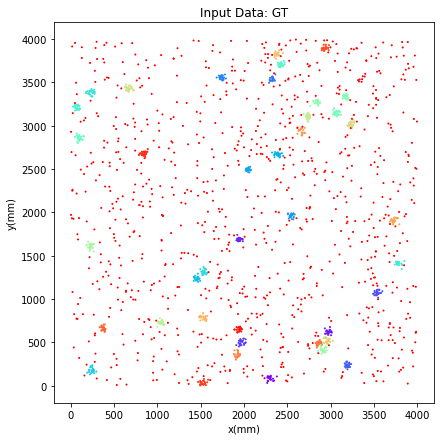

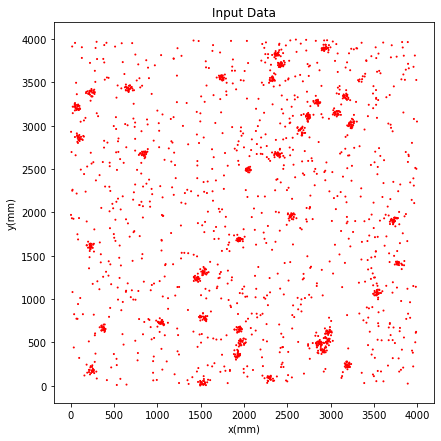

In [48]:
p = Standard_Param()
datagen = Call_DataGenerator(p)
datagen.plot_points()

In [49]:
N = len(datagen.GetPoints())

In [50]:
N = len(datagen.GetPoints())
csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])

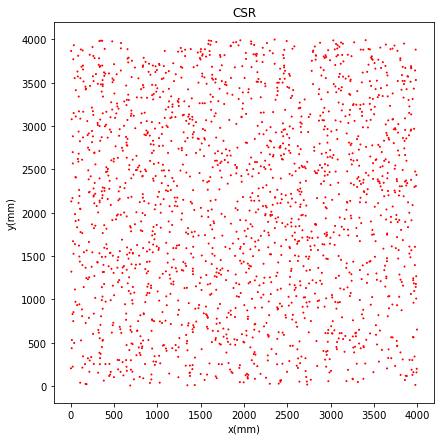

In [51]:
csr.plot_points()

10
N =  150


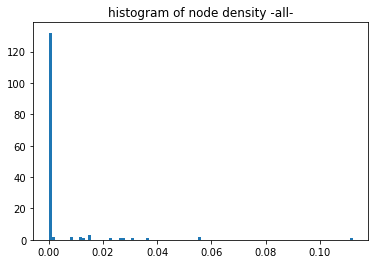

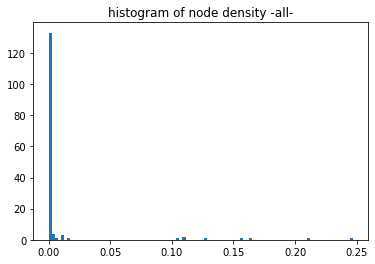

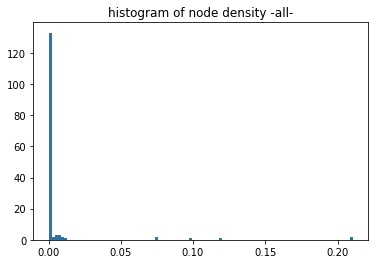

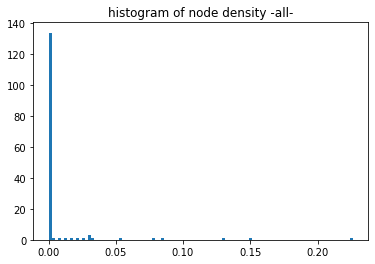

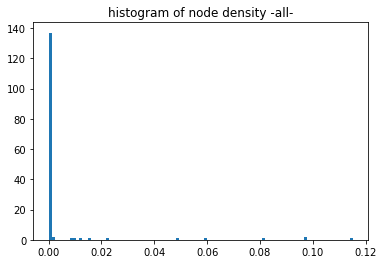

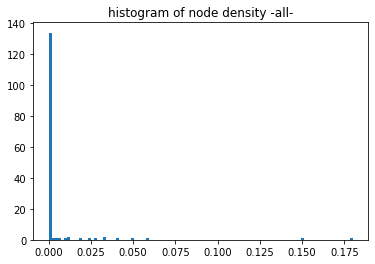

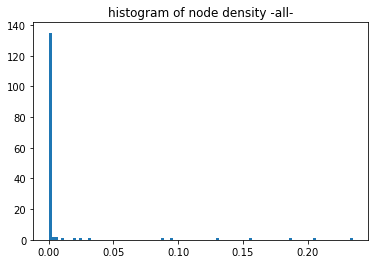

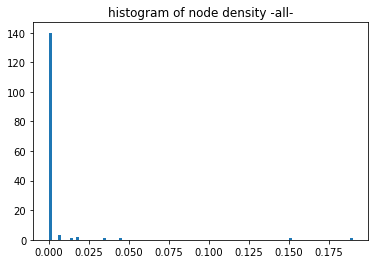

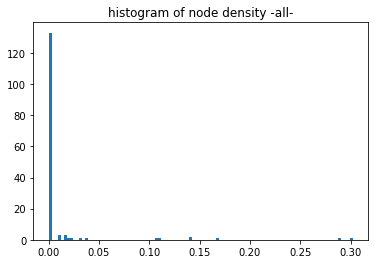

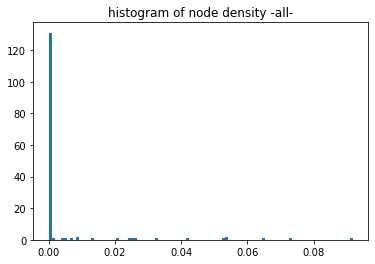

N =  200


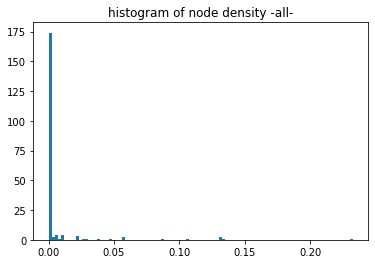

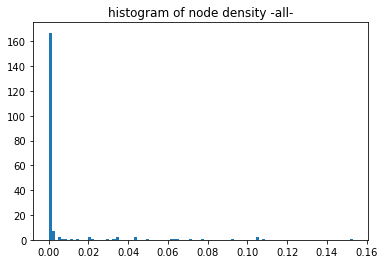

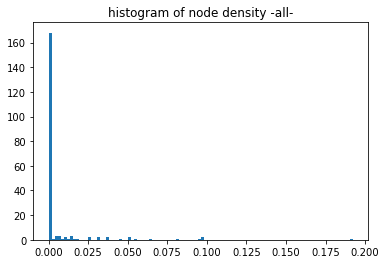

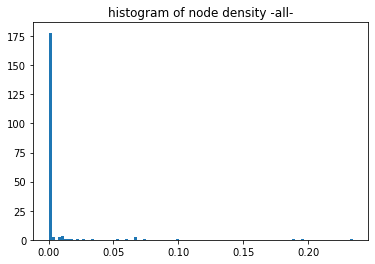

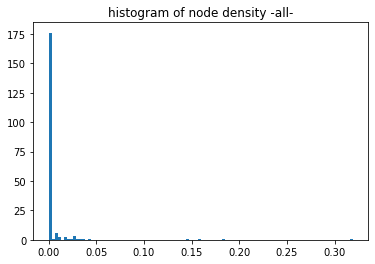

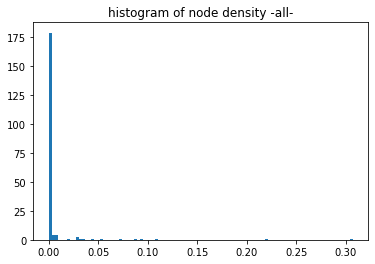

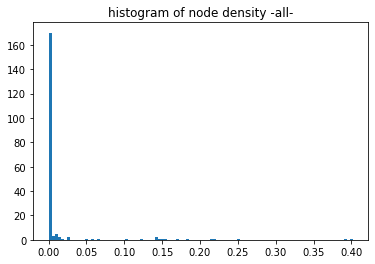

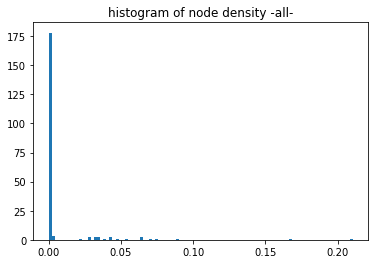

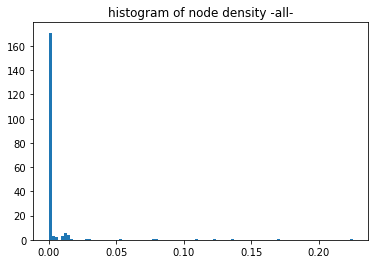

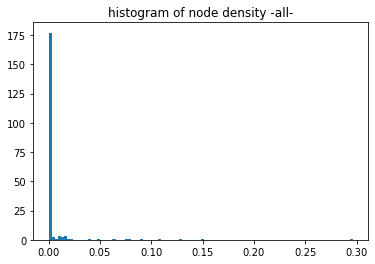

N =  250


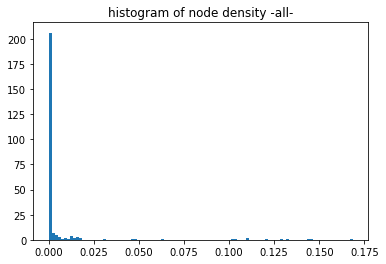

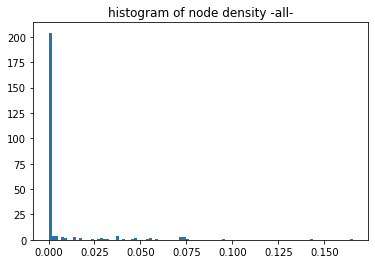

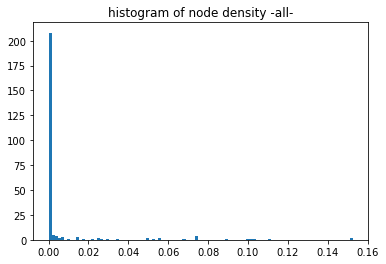

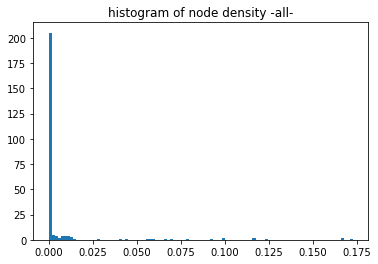

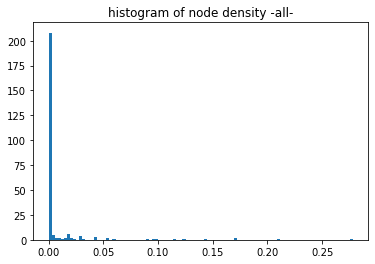

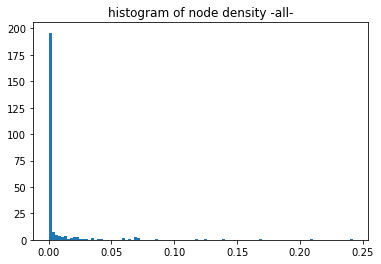

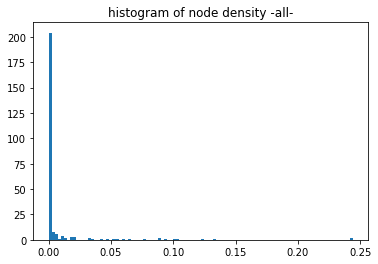

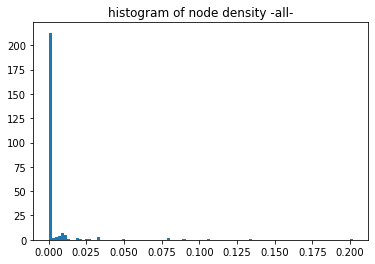

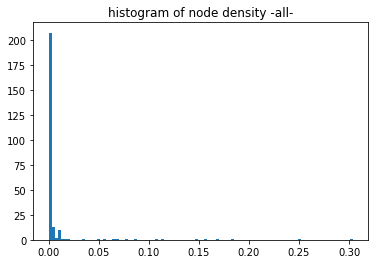

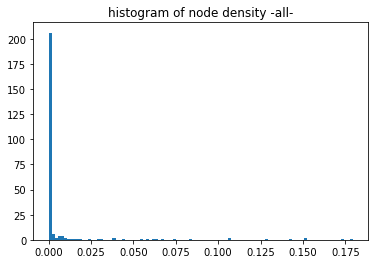

N =  300


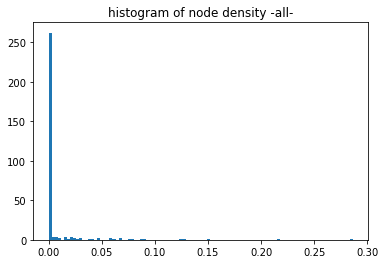

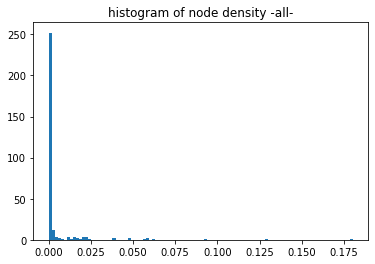

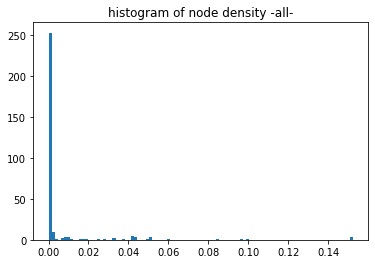

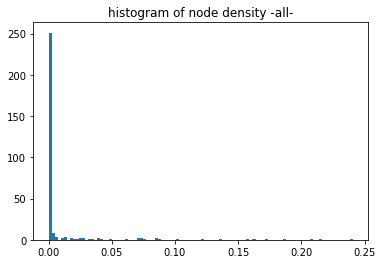

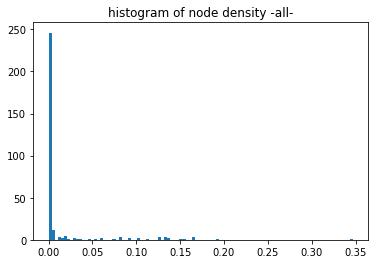

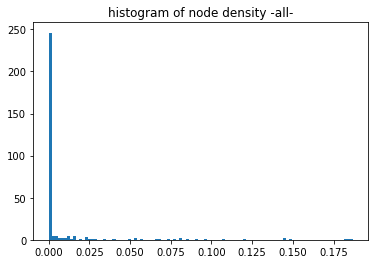

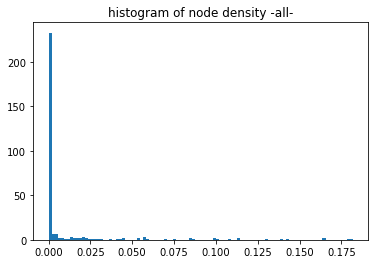

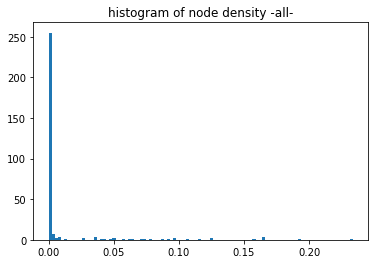

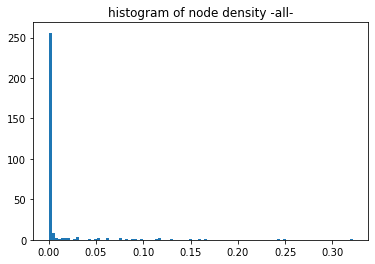

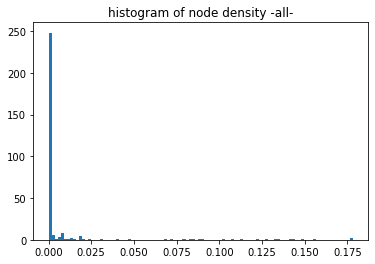

N =  350


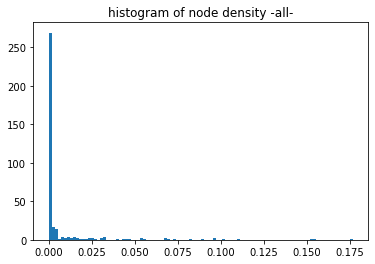

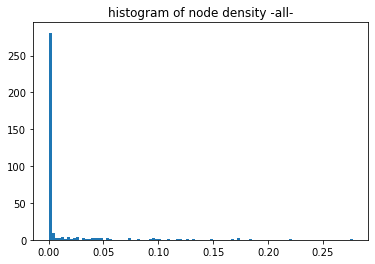

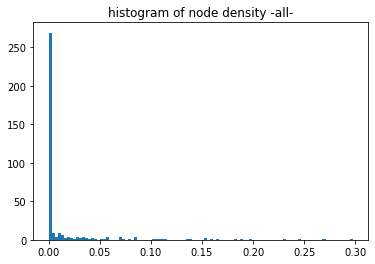

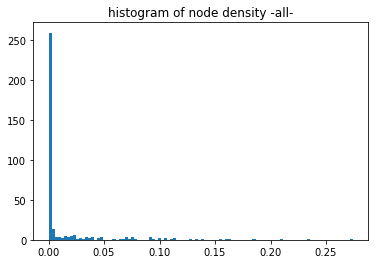

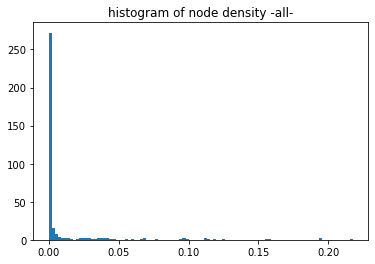

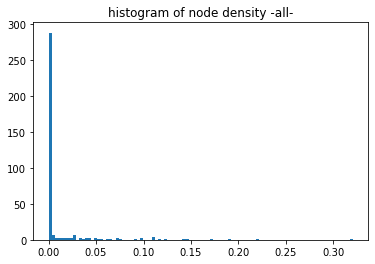

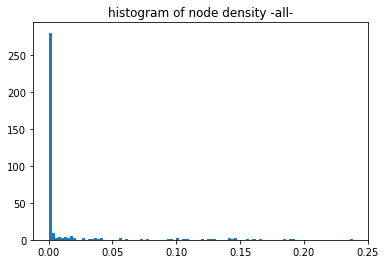

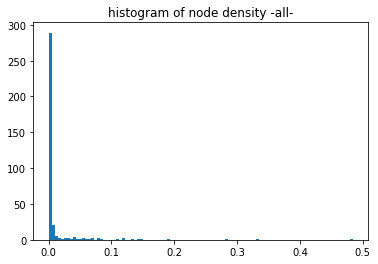

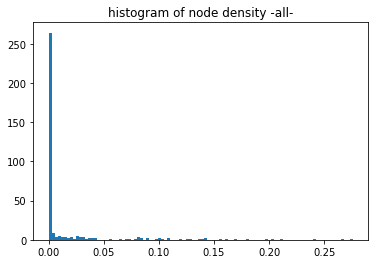

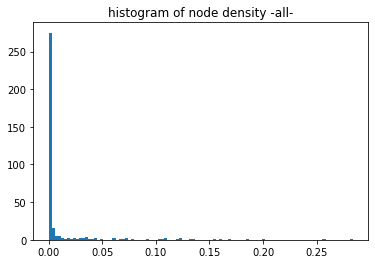

N =  400


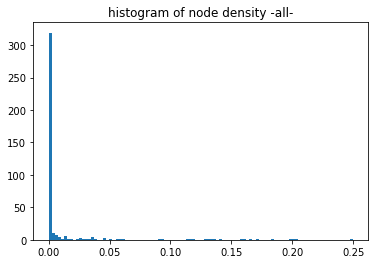

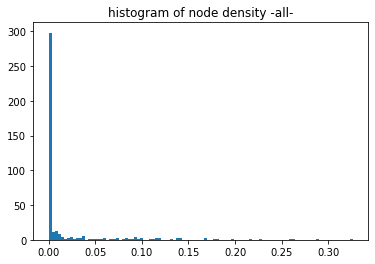

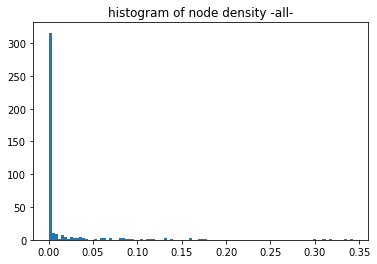

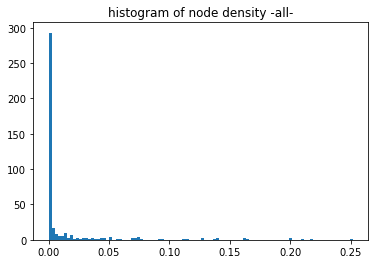

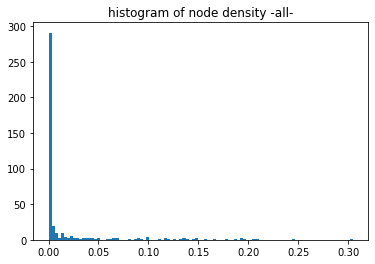

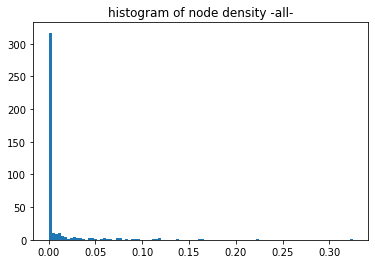

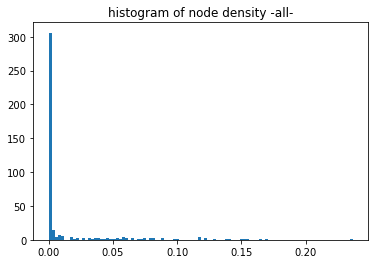

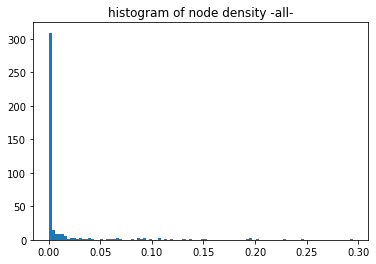

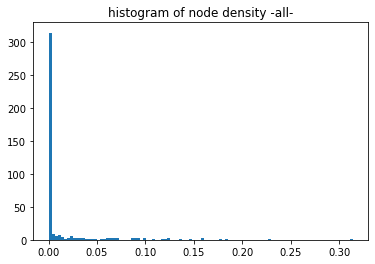

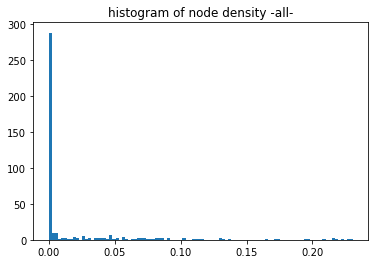

N =  450


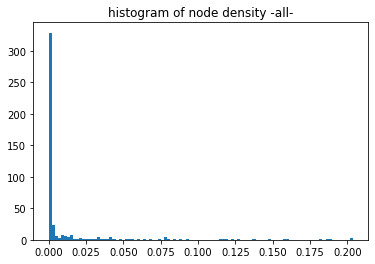

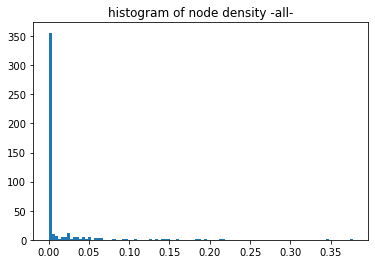

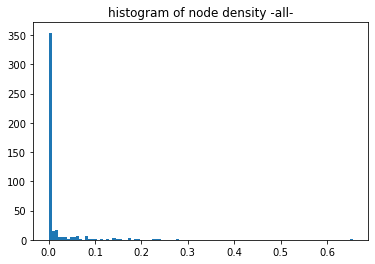

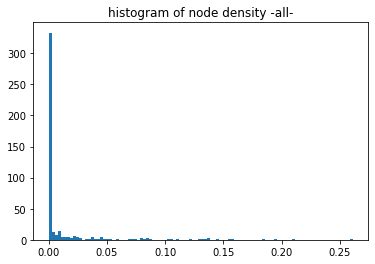

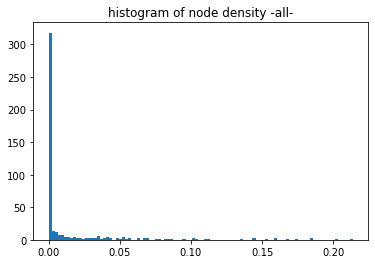

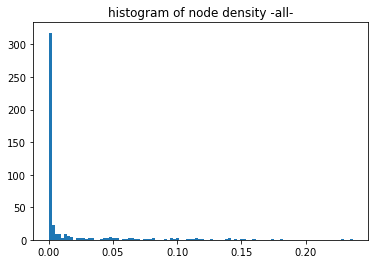

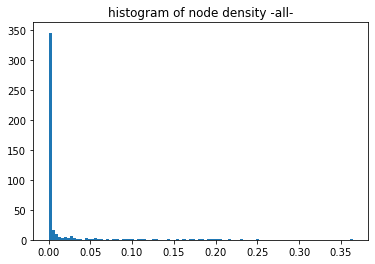

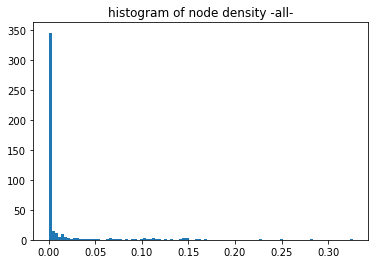

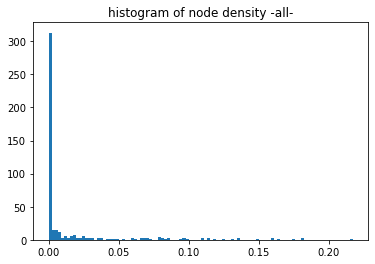

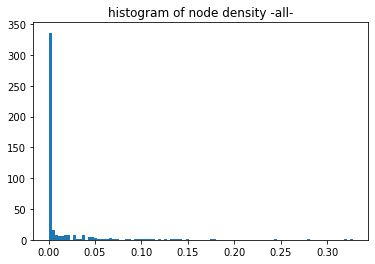

N =  500


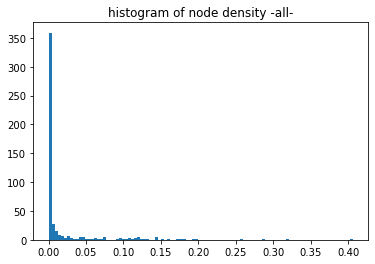

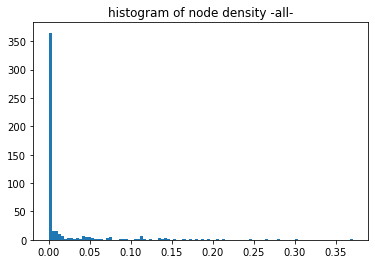

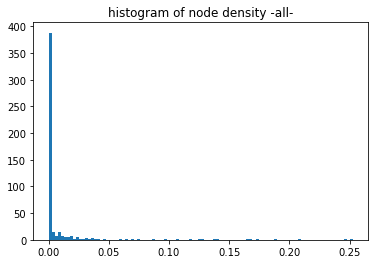

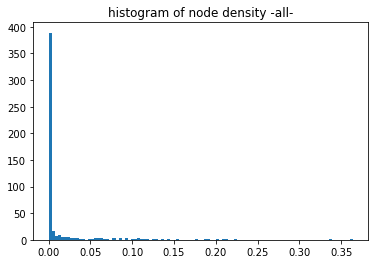

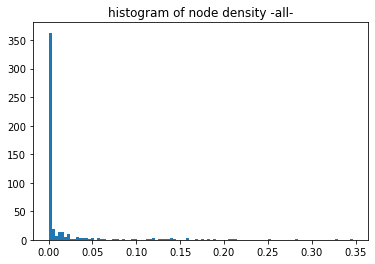

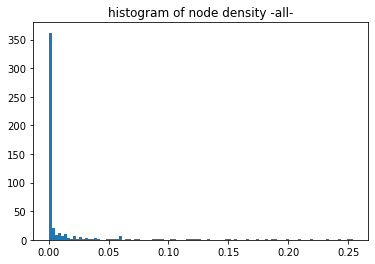

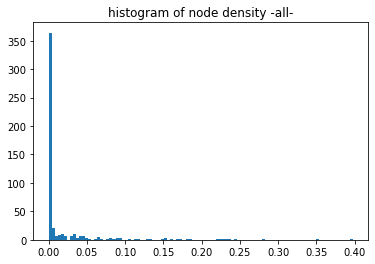

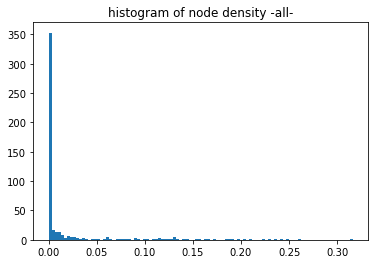

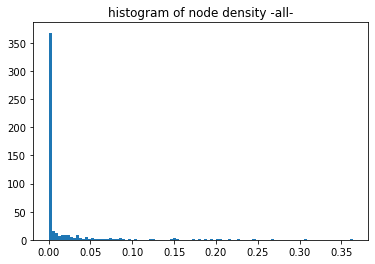

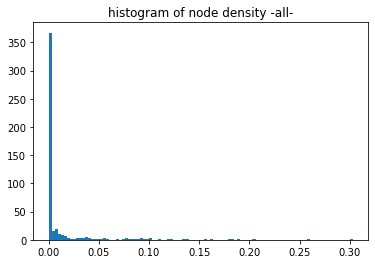

N =  550


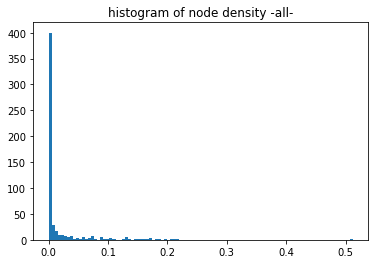

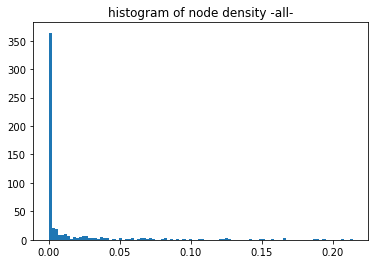

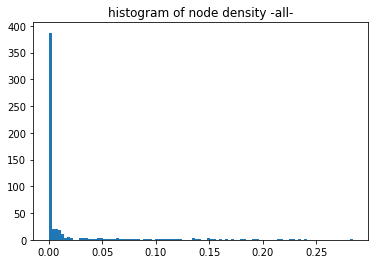

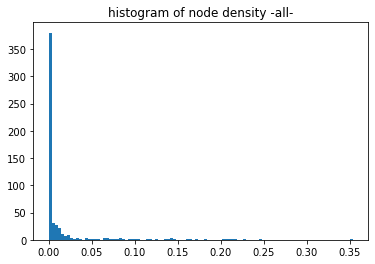

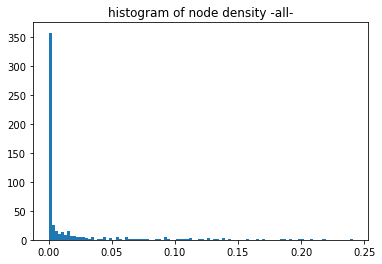

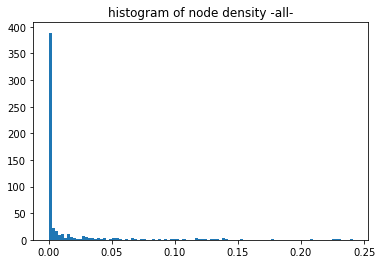

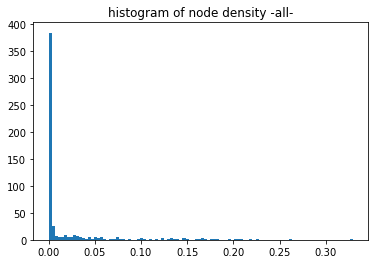

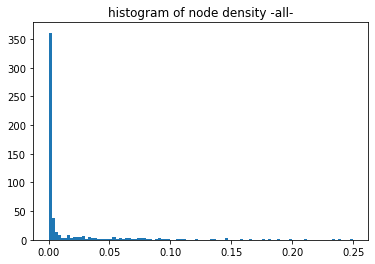

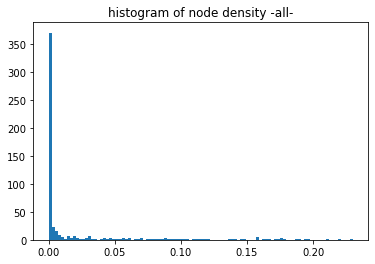

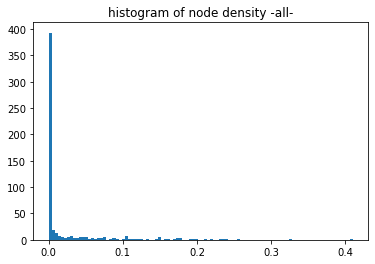

N =  600


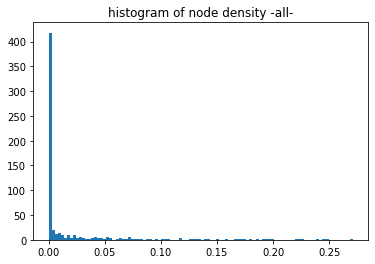

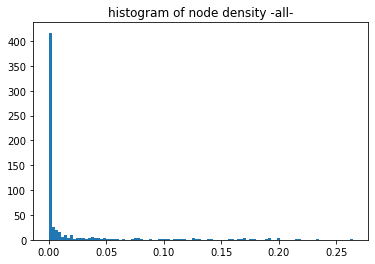

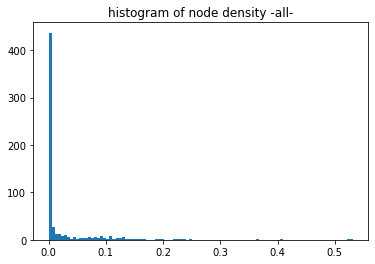

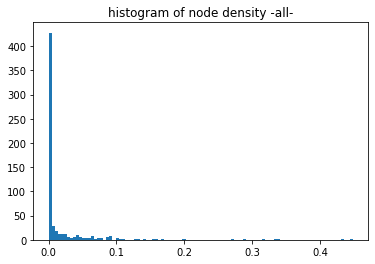

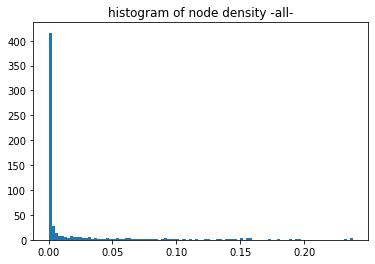

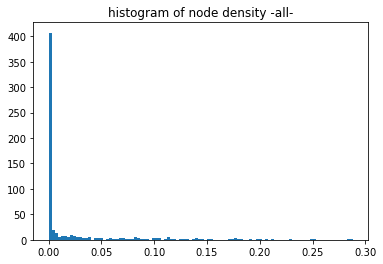

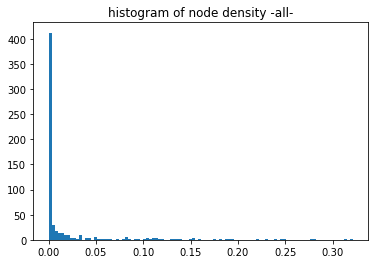

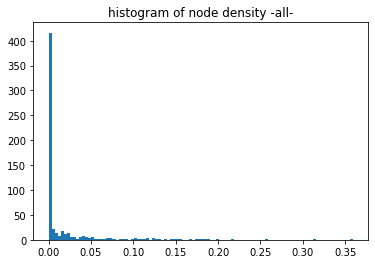

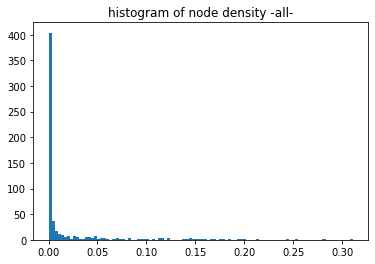

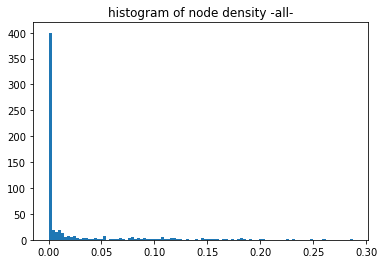

N =  650


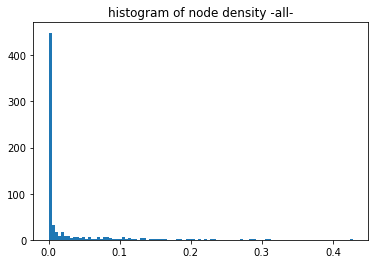

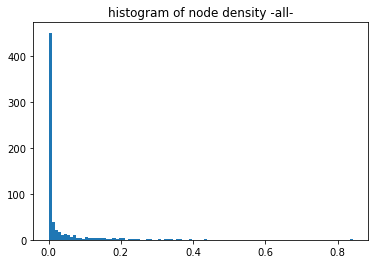

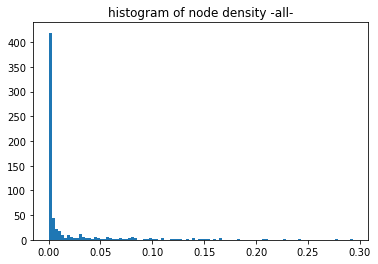

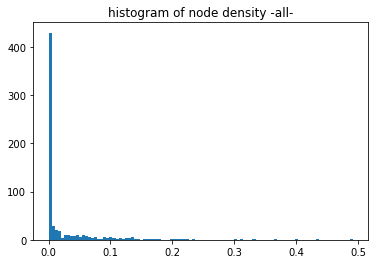

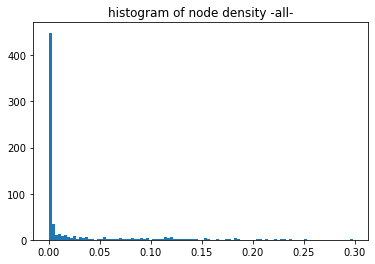

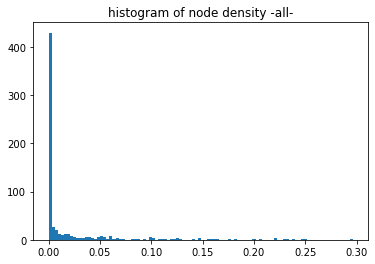

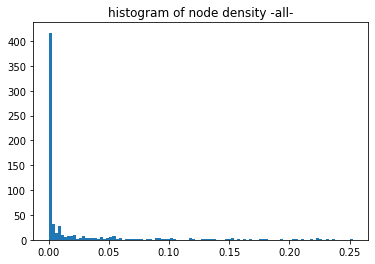

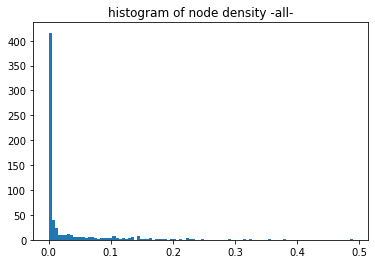

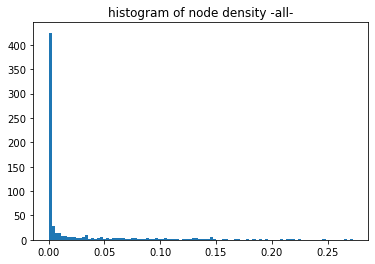

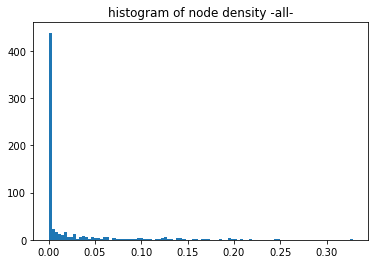

N =  700


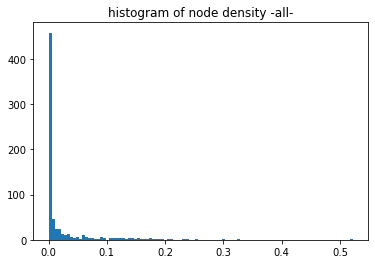

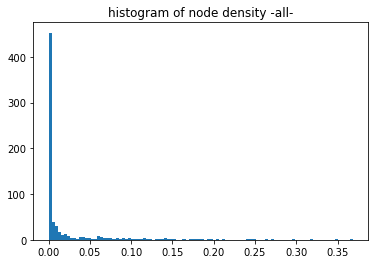

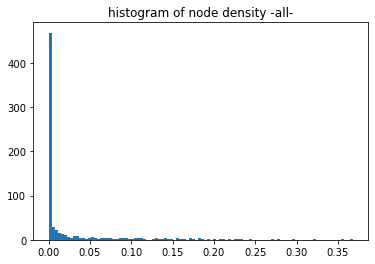

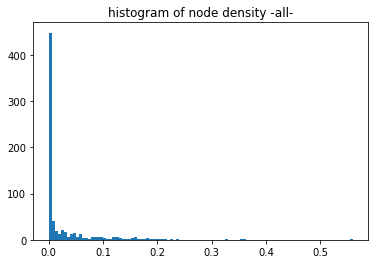

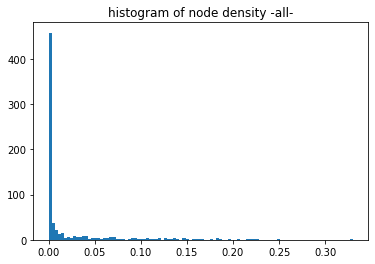

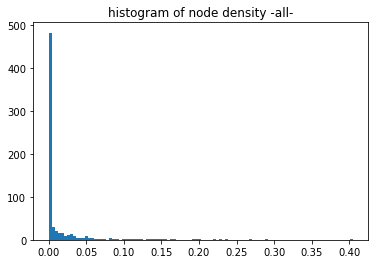

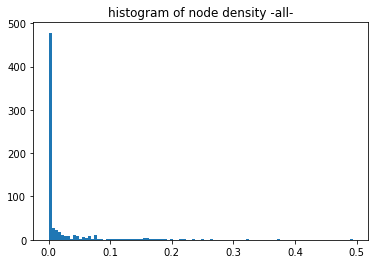

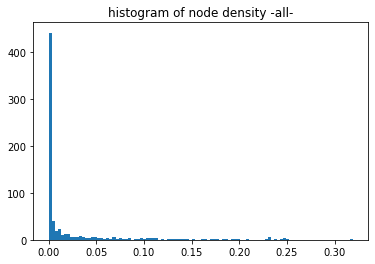

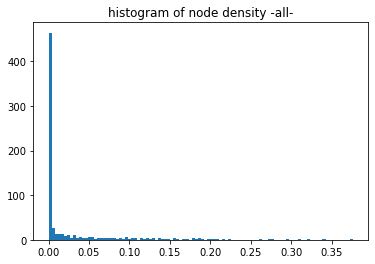

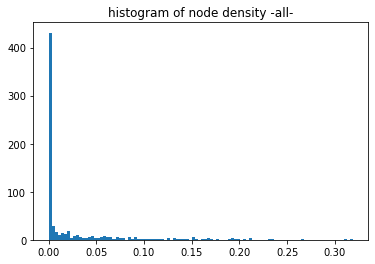

N =  750


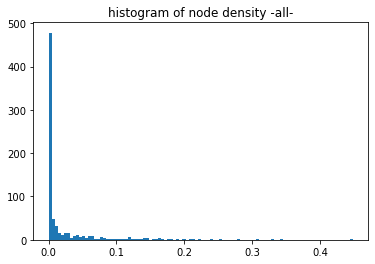

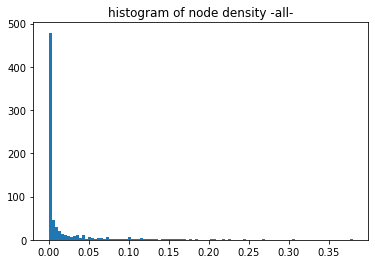

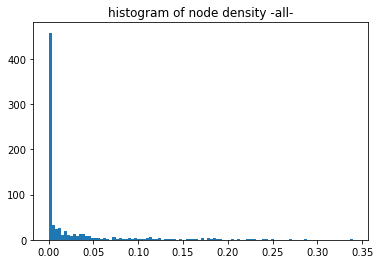

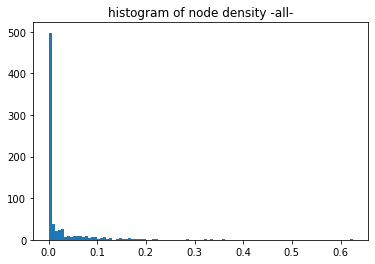

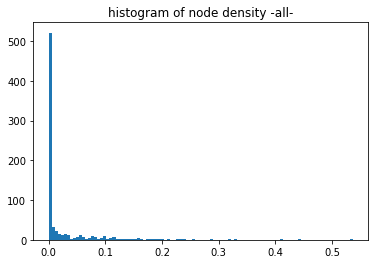

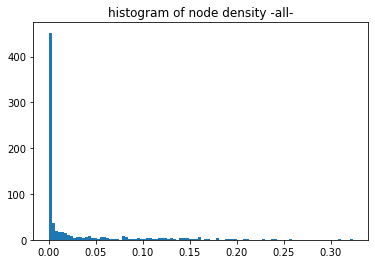

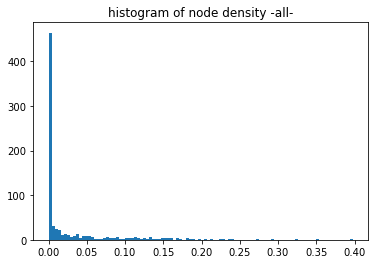

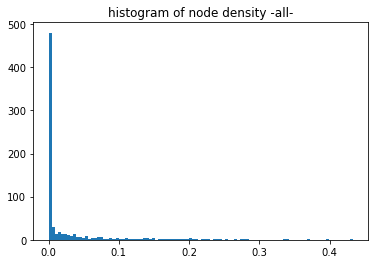

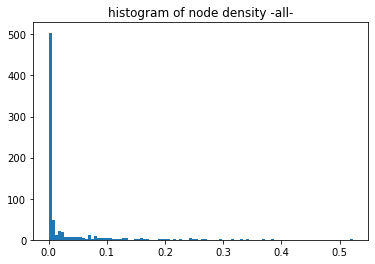

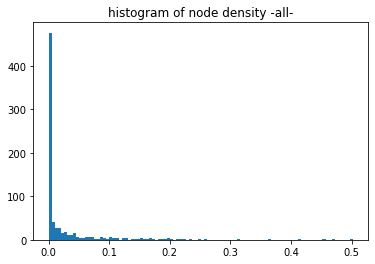

55
N =  150


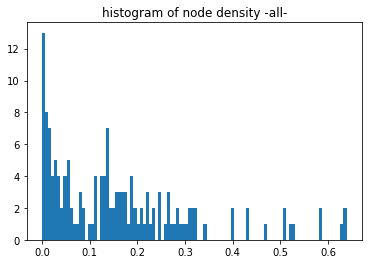

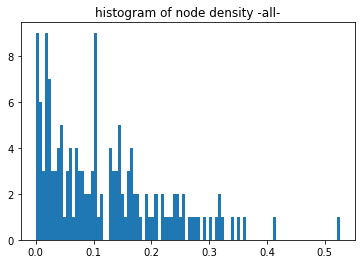

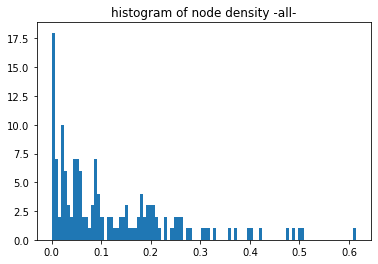

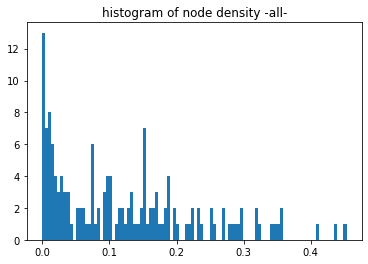

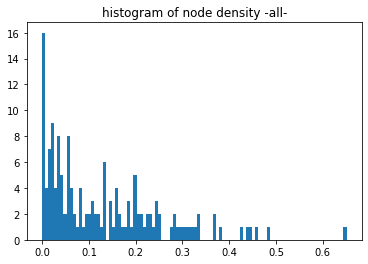

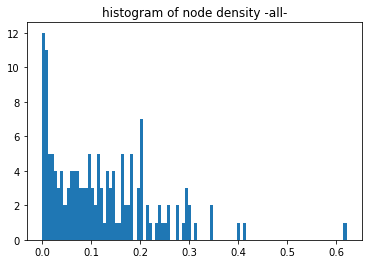

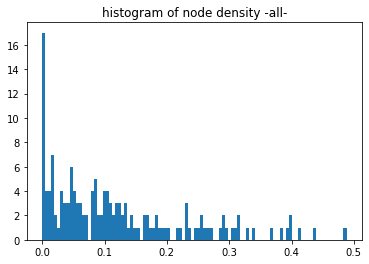

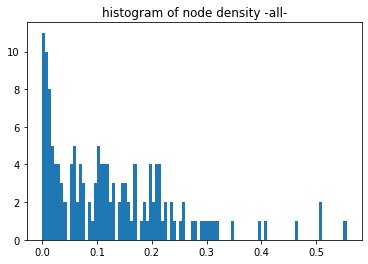

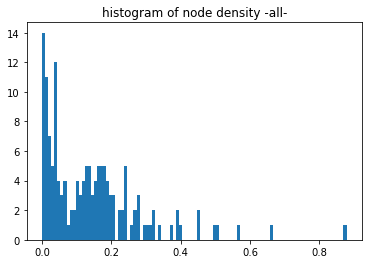

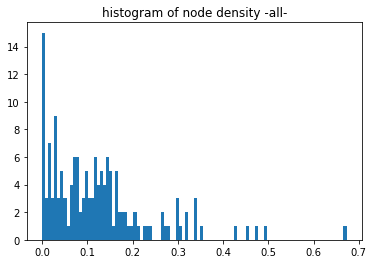

N =  200


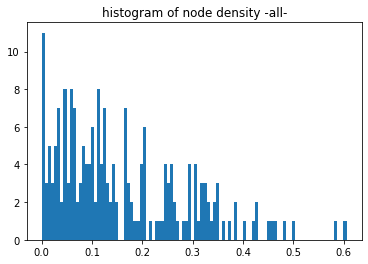

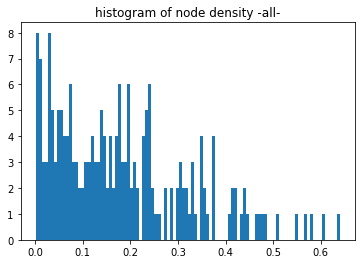

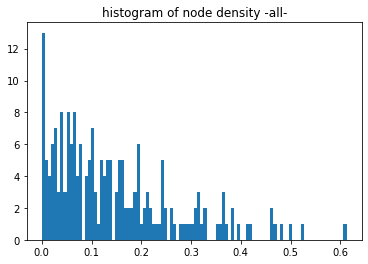

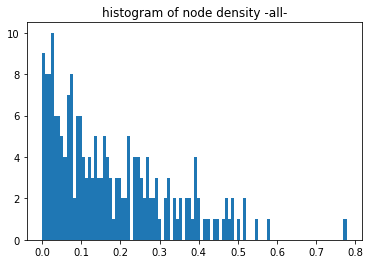

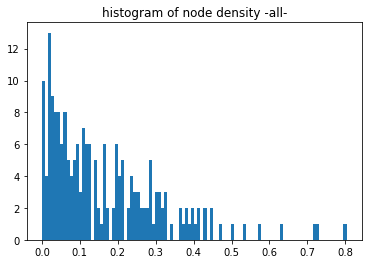

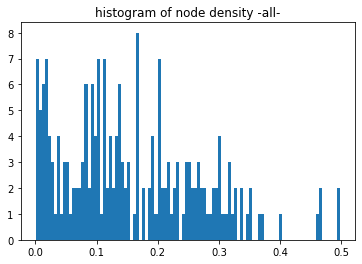

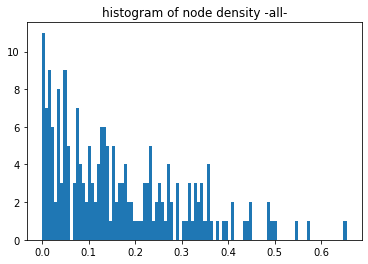

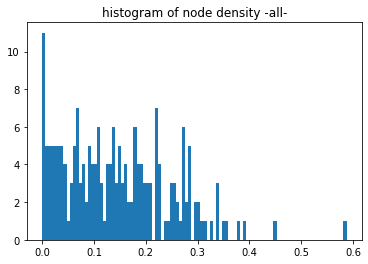

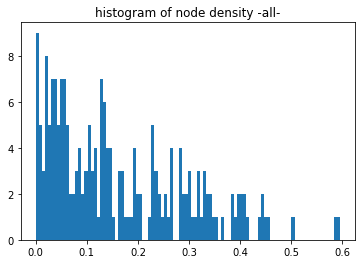

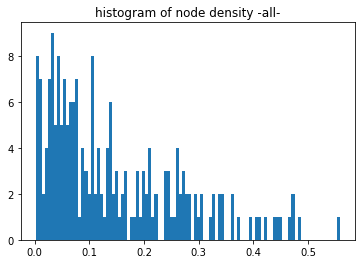

N =  250


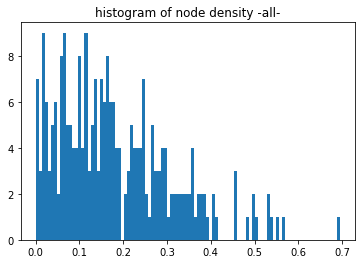

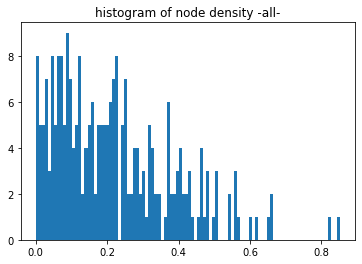

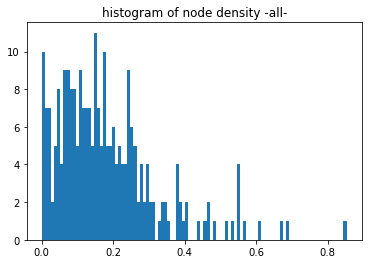

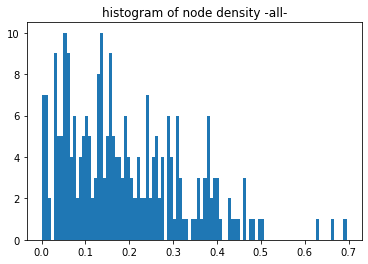

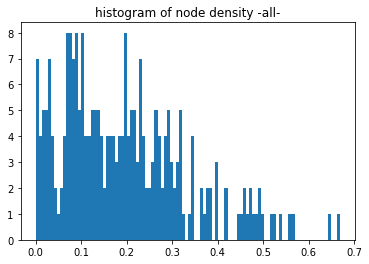

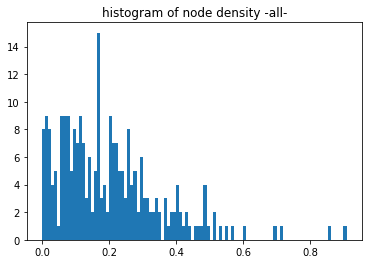

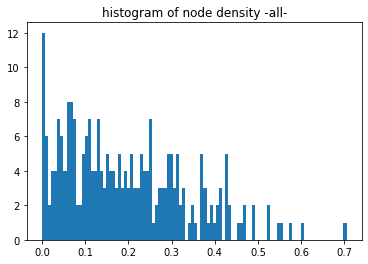

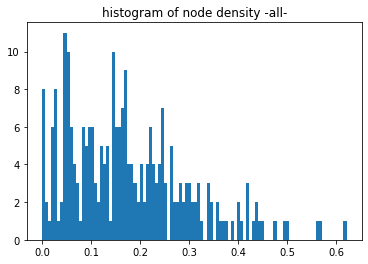

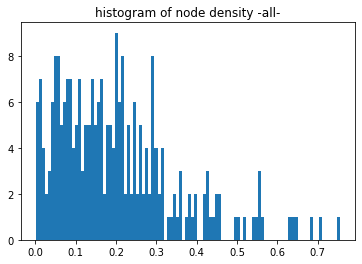

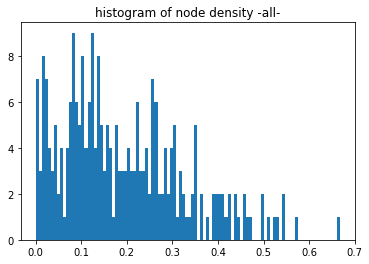

N =  300


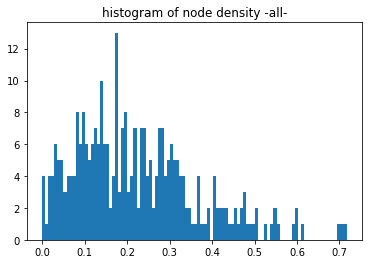

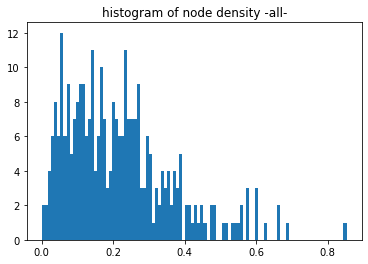

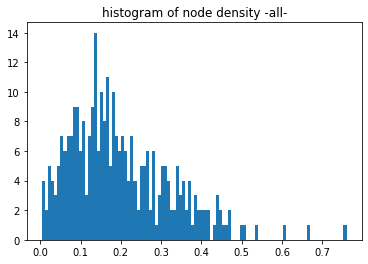

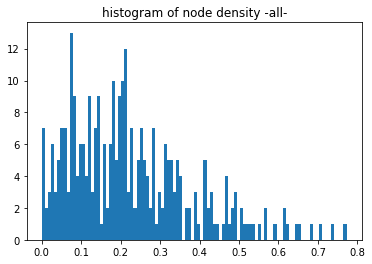

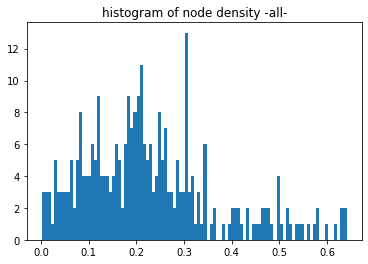

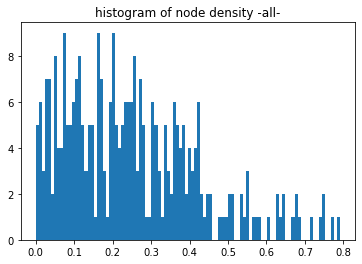

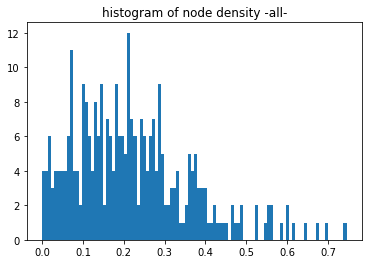

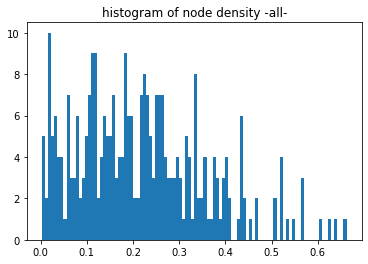

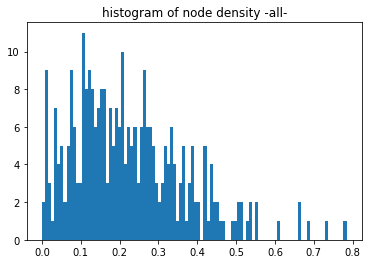

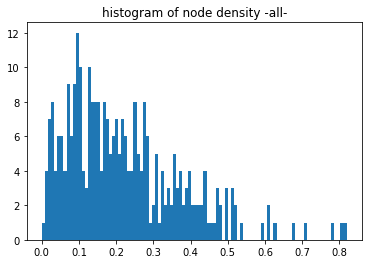

N =  350


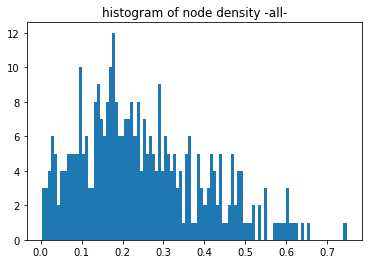

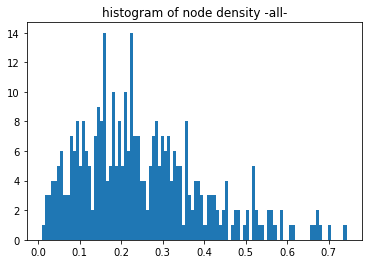

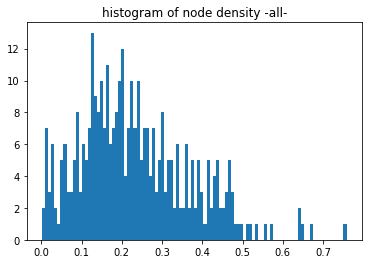

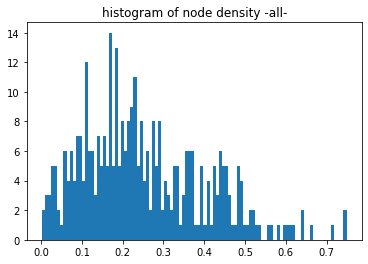

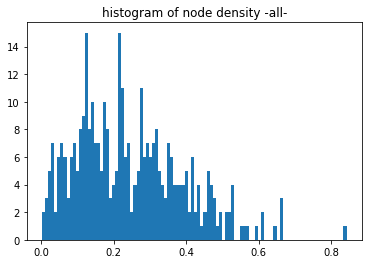

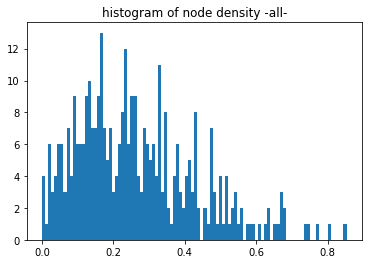

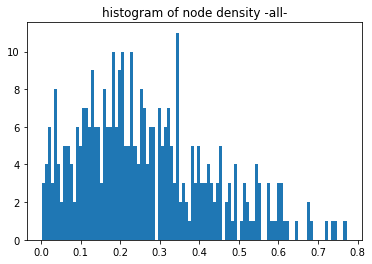

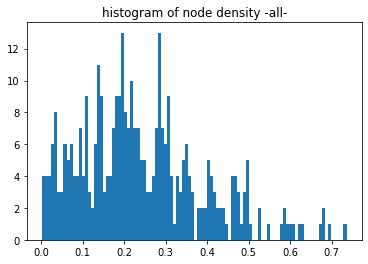

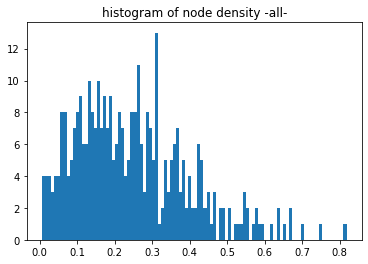

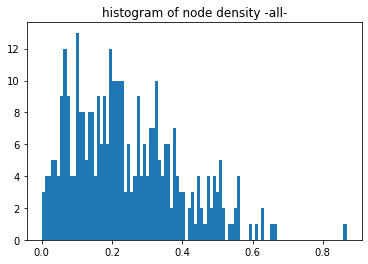

N =  400


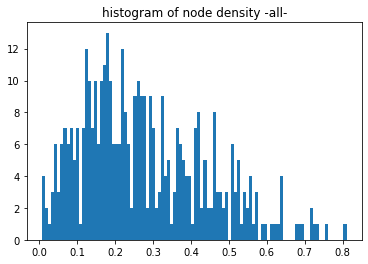

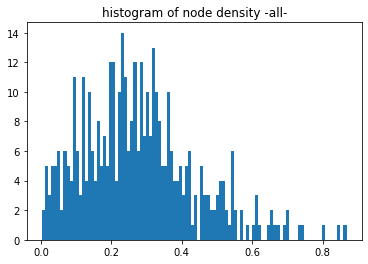

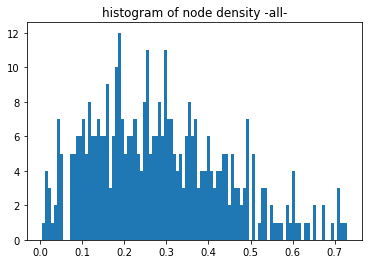

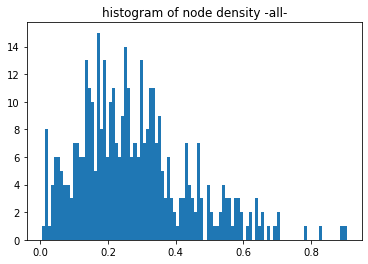

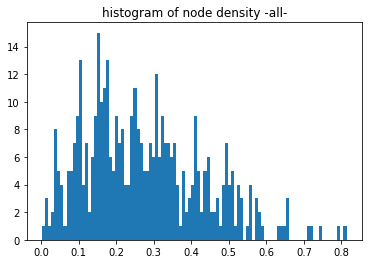

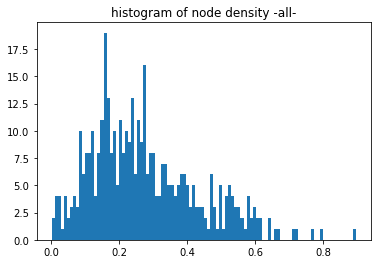

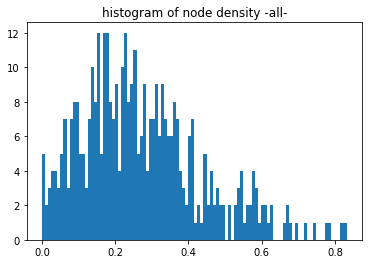

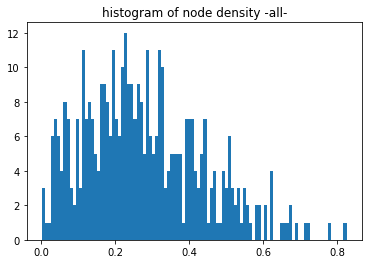

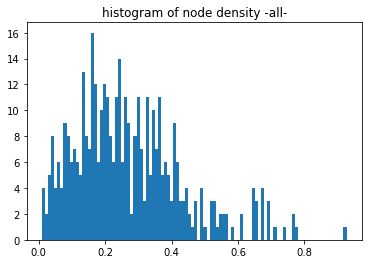

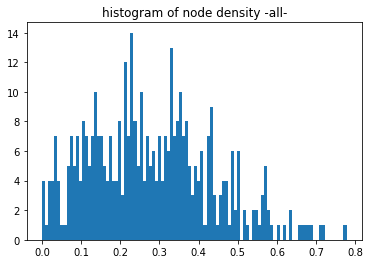

N =  450


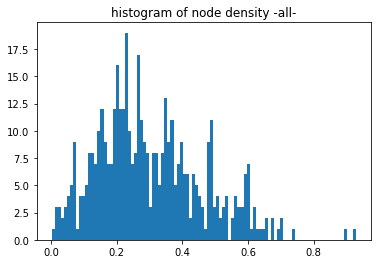

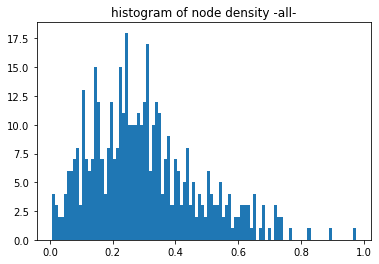

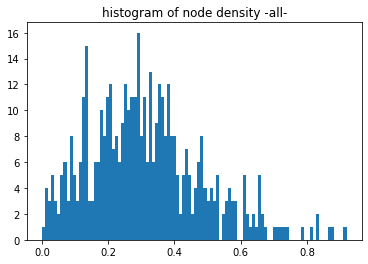

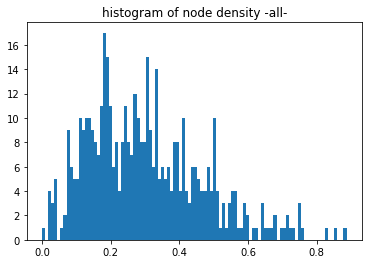

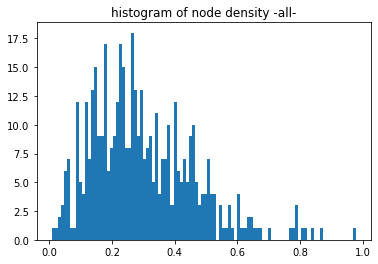

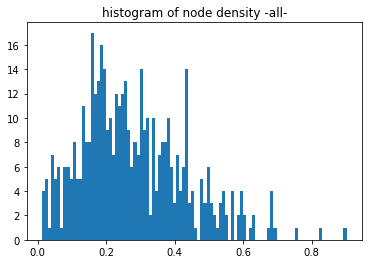

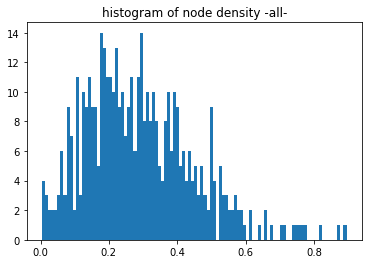

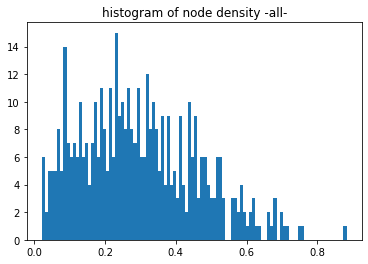

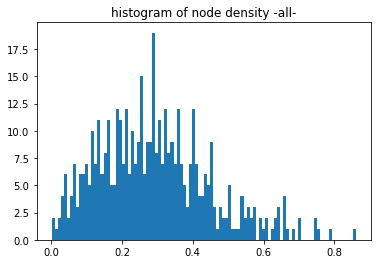

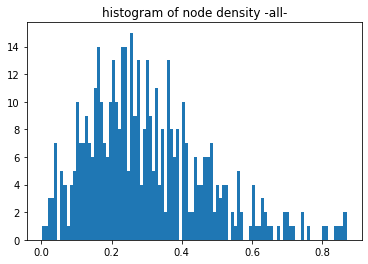

N =  500


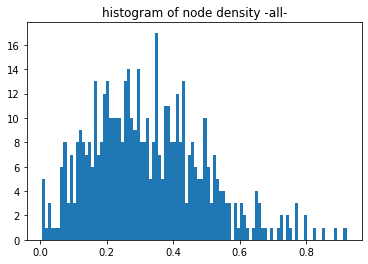

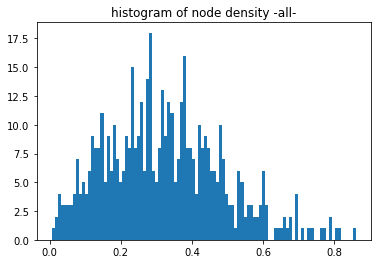

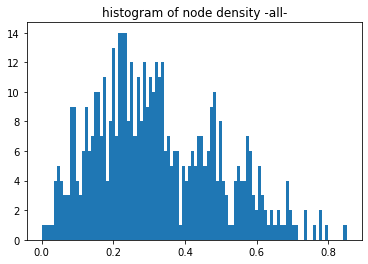

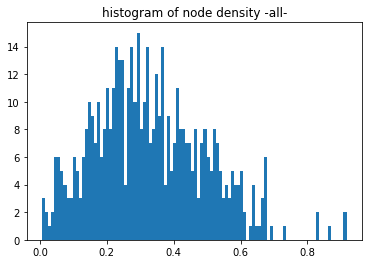

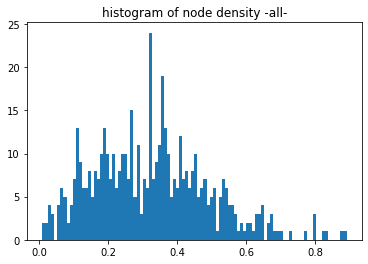

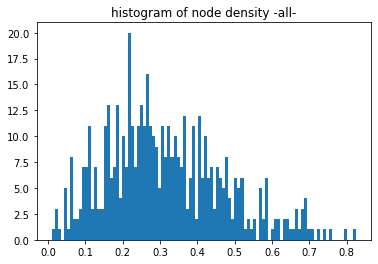

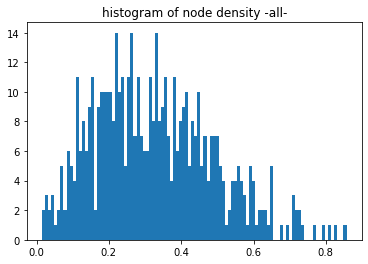

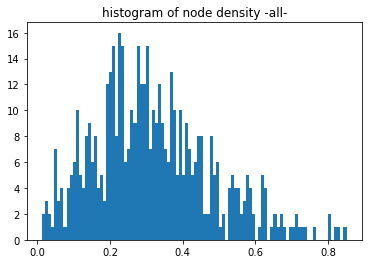

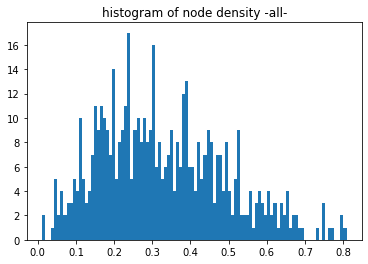

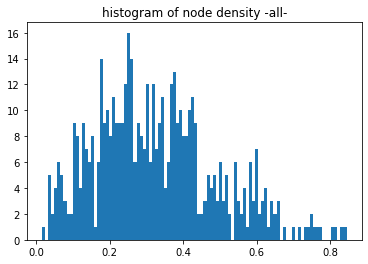

N =  550


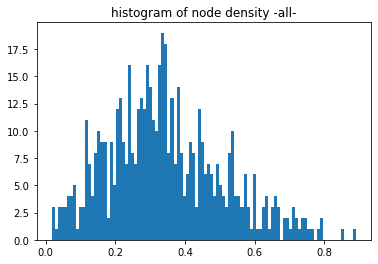

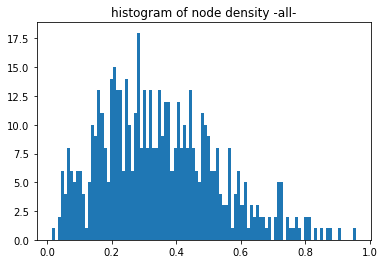

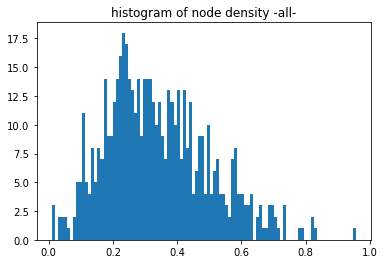

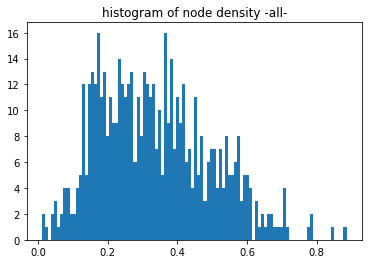

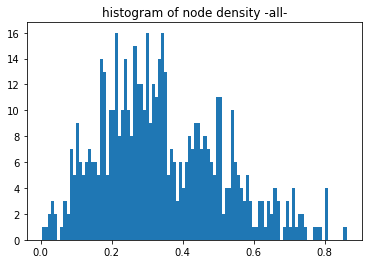

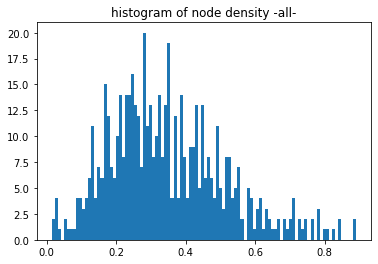

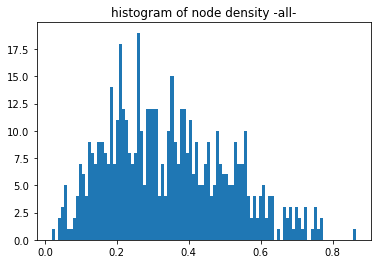

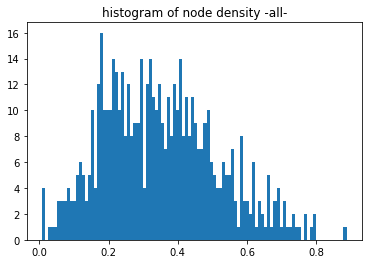

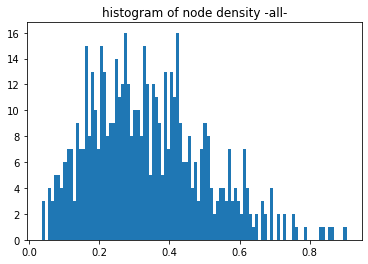

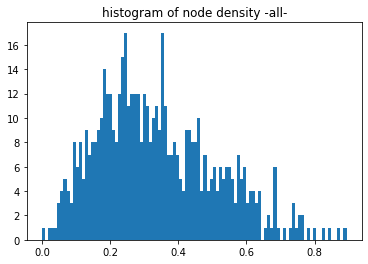

N =  600


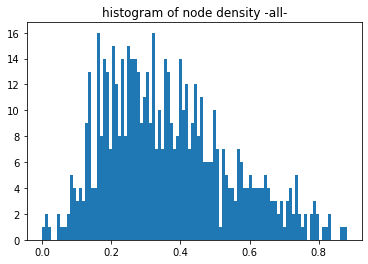

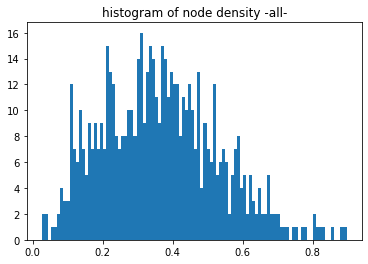

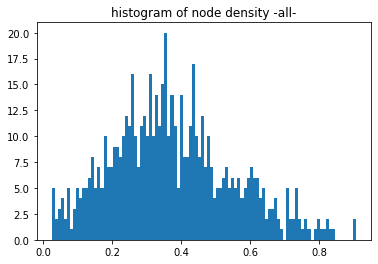

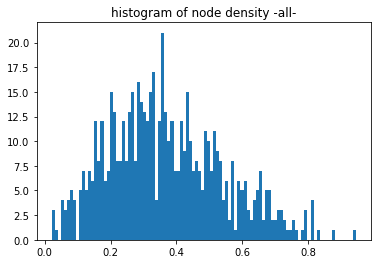

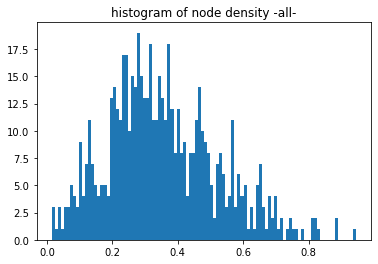

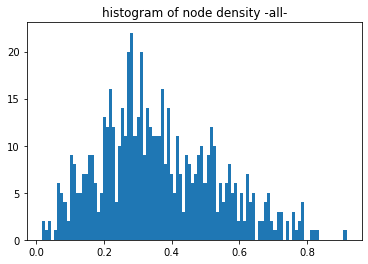

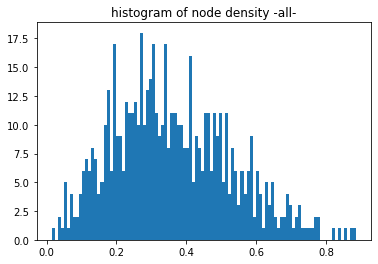

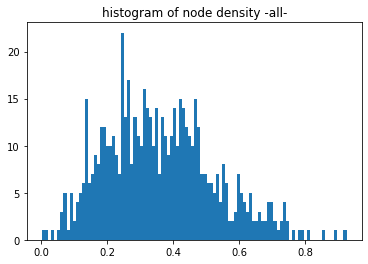

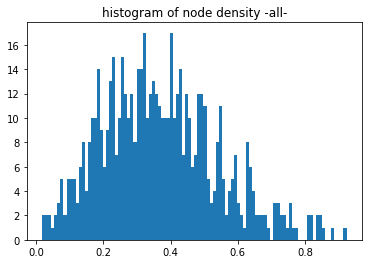

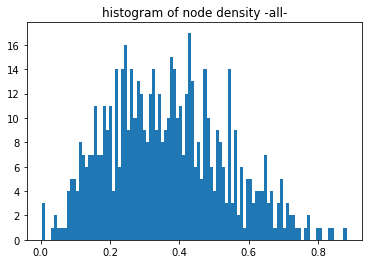

N =  650


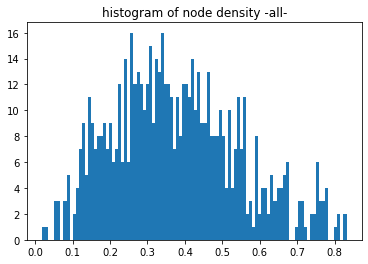

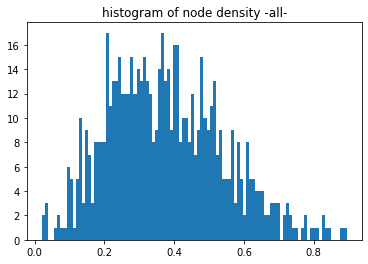

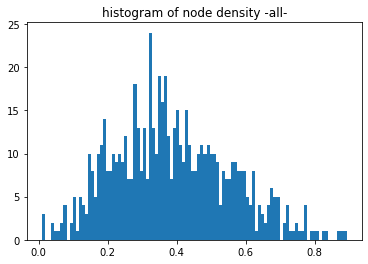

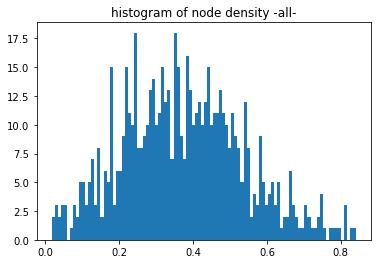

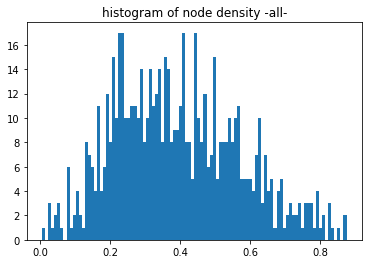

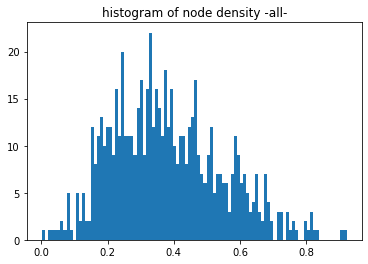

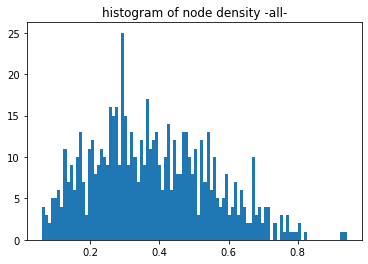

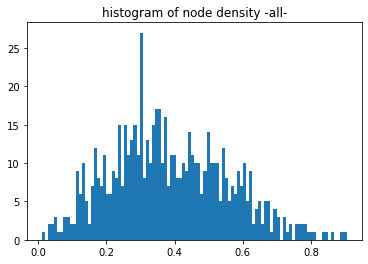

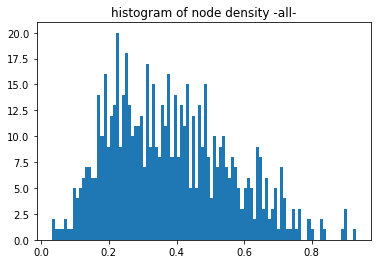

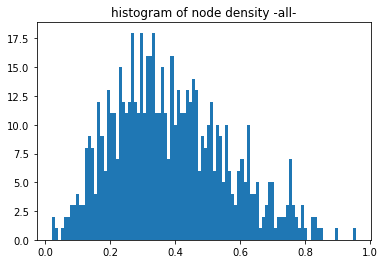

N =  700


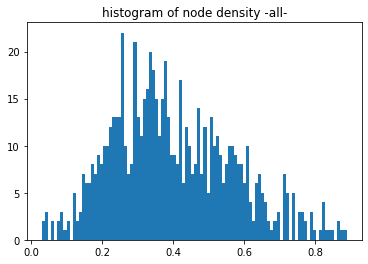

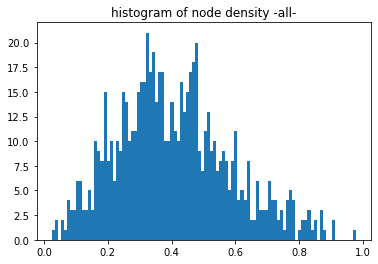

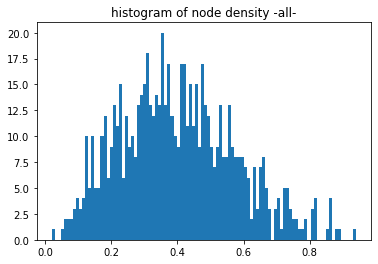

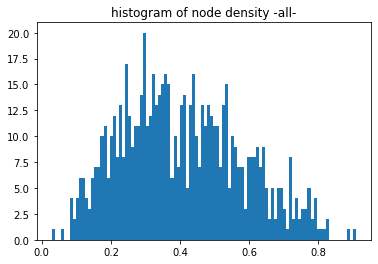

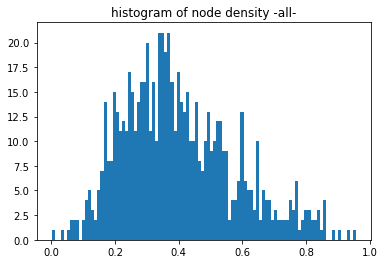

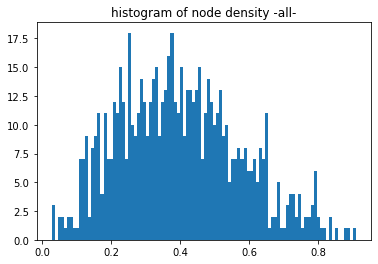

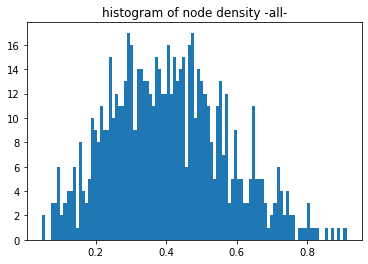

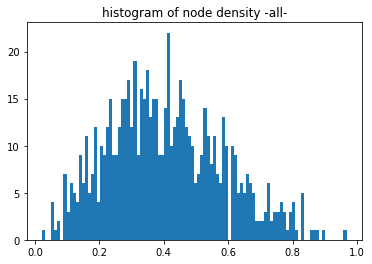

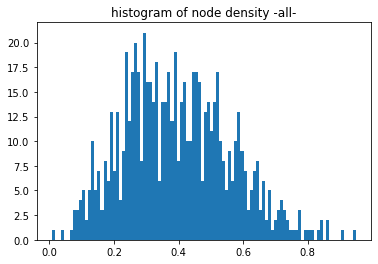

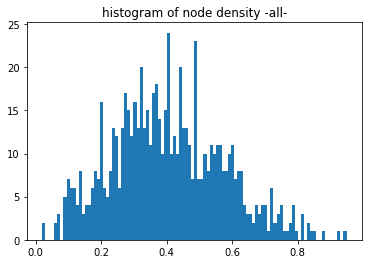

N =  750


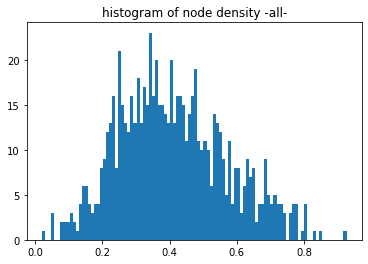

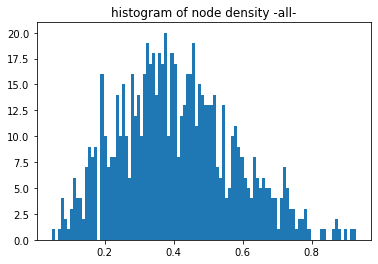

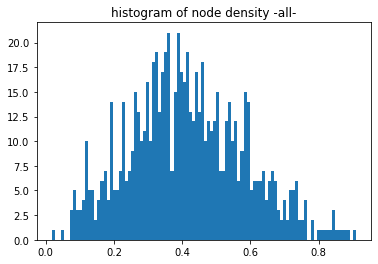

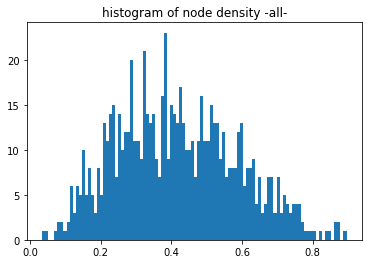

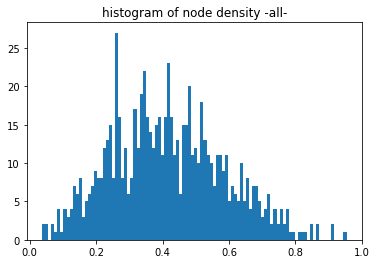

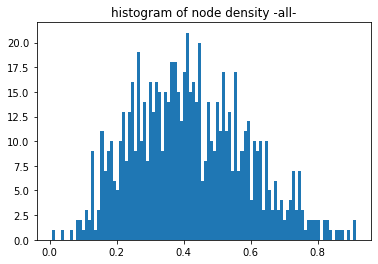

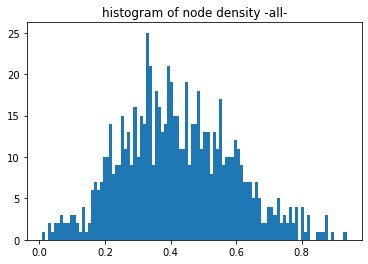

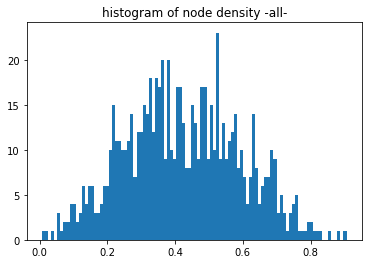

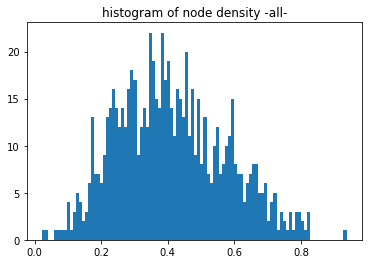

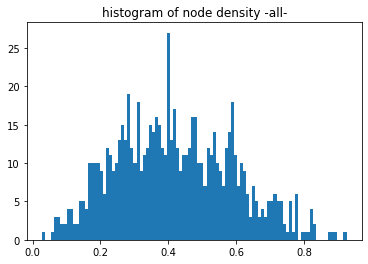

100
N =  150


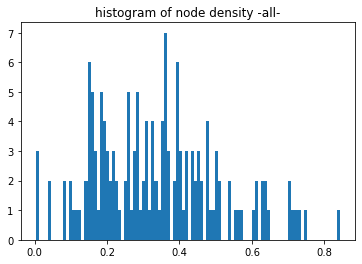

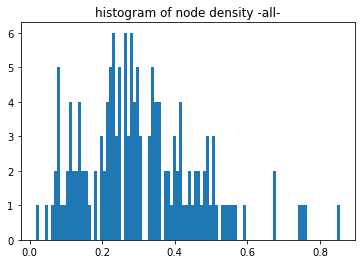

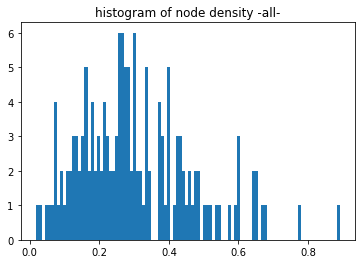

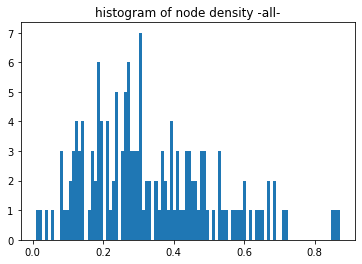

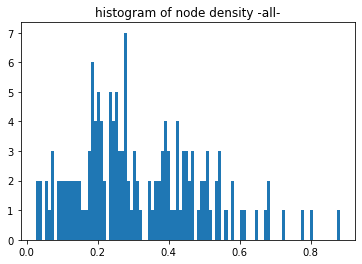

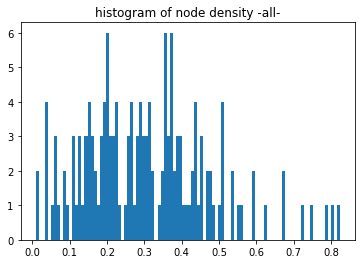

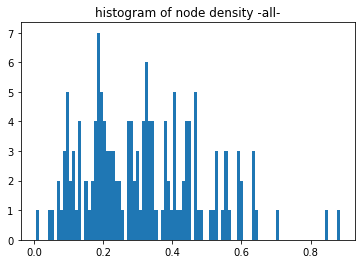

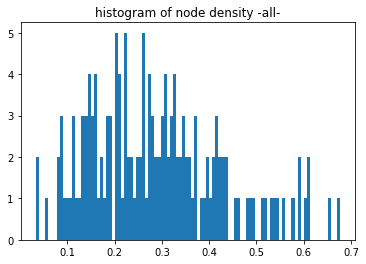

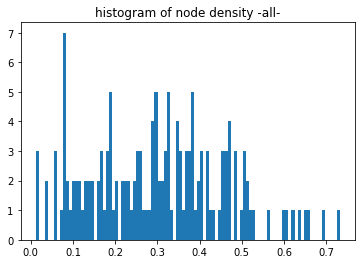

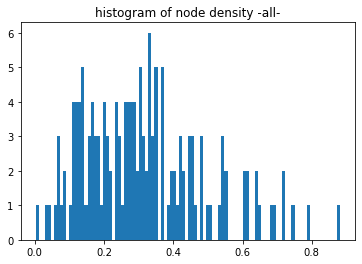

N =  200


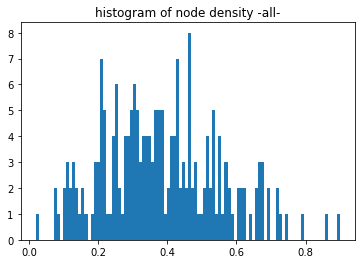

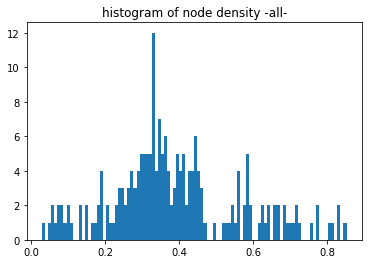

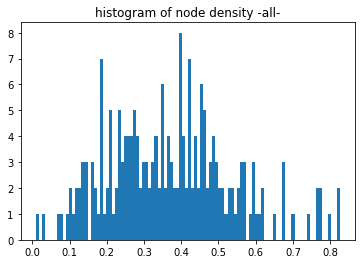

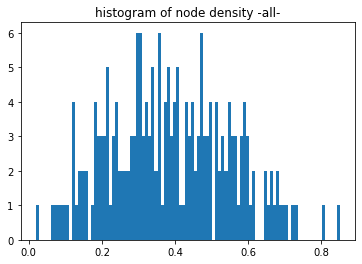

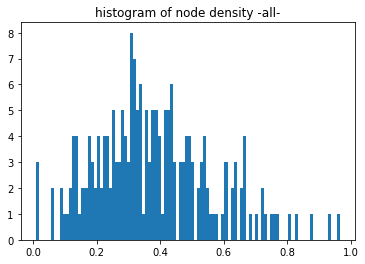

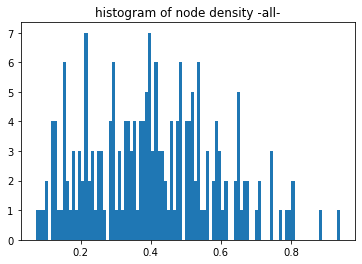

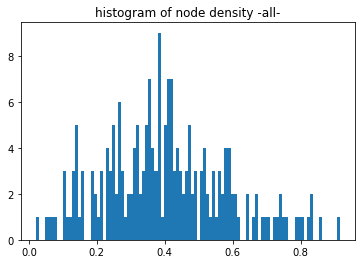

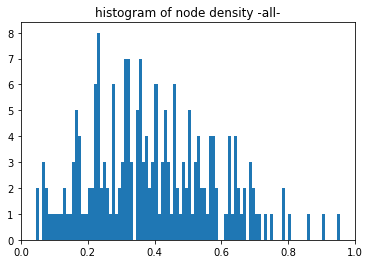

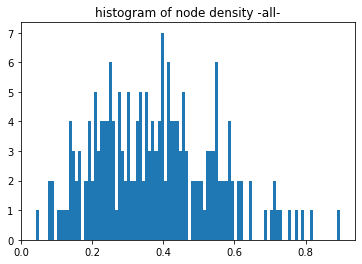

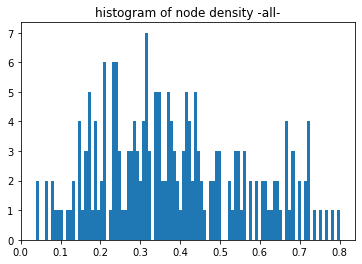

N =  250


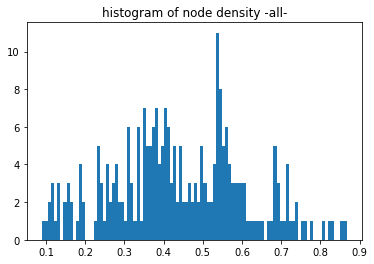

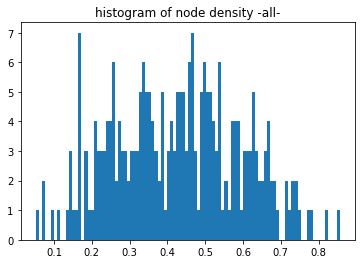

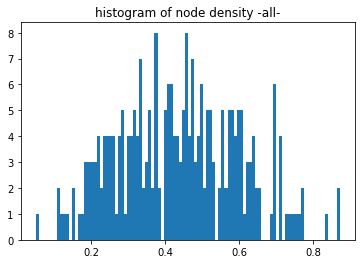

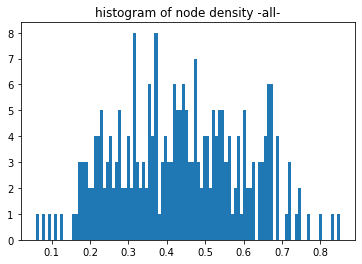

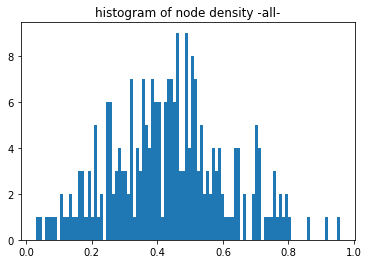

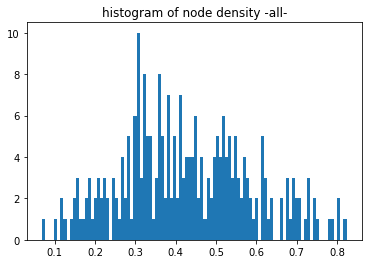

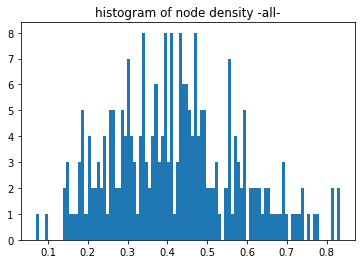

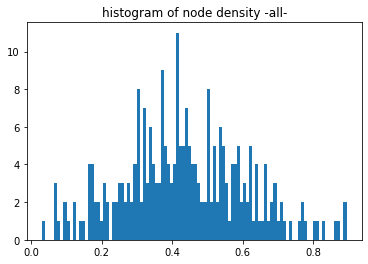

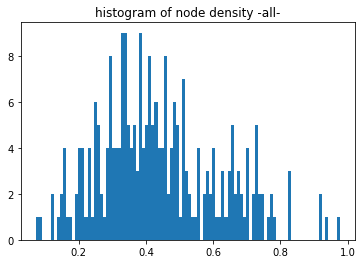

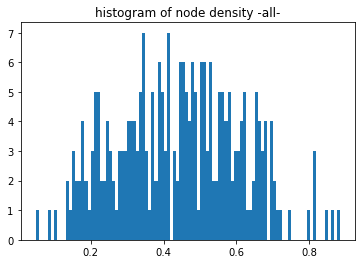

N =  300


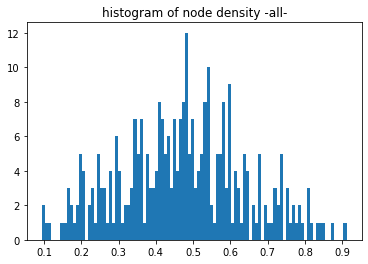

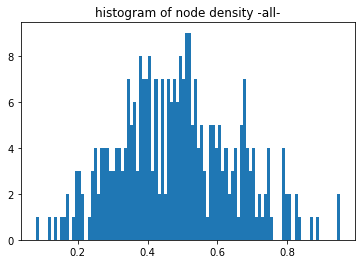

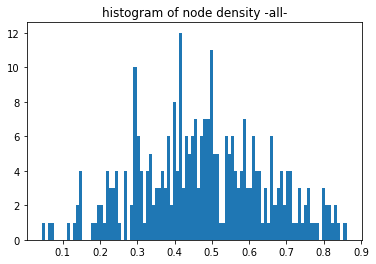

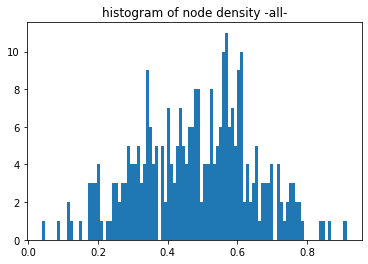

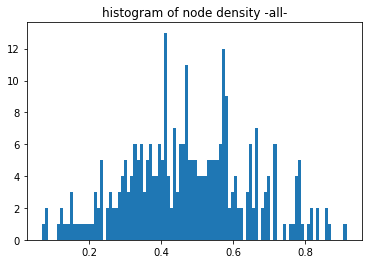

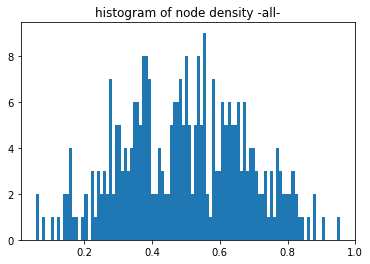

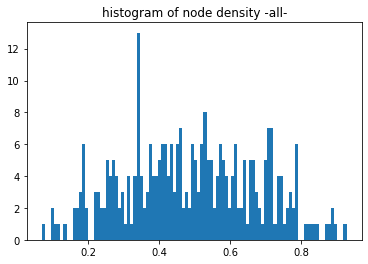

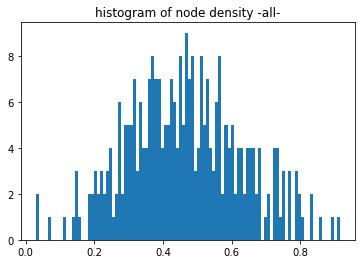

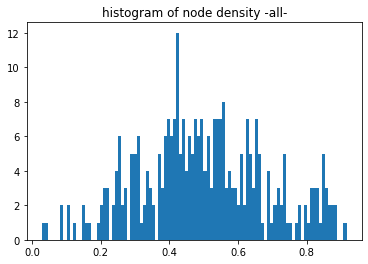

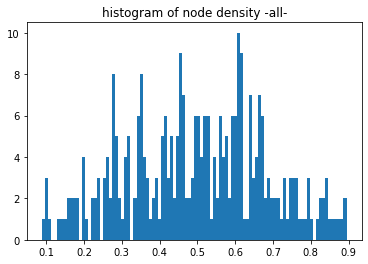

N =  350


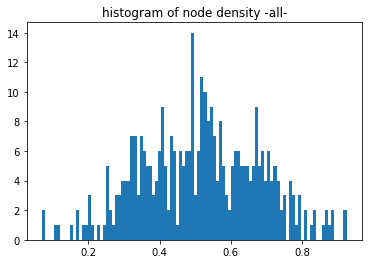

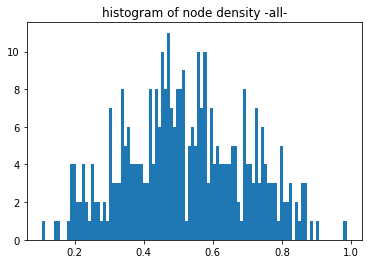

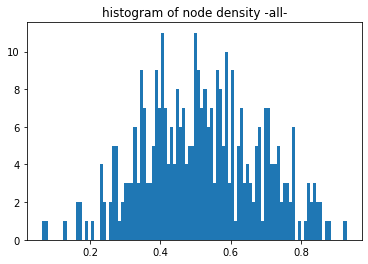

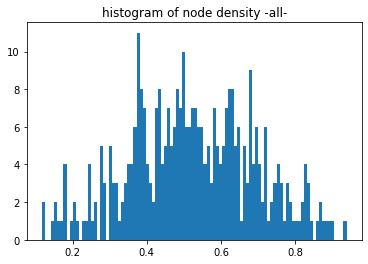

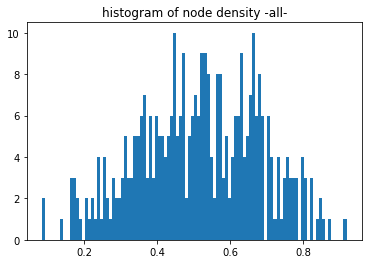

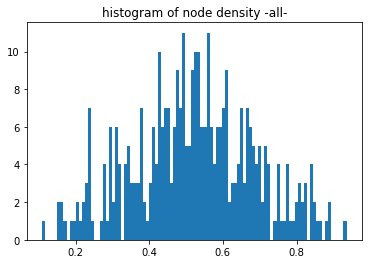

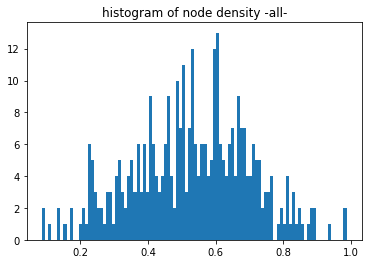

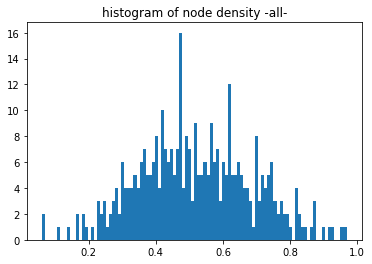

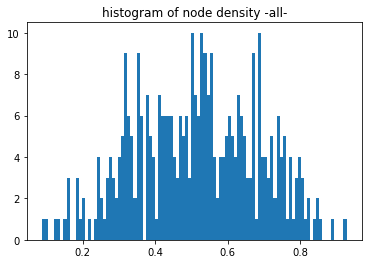

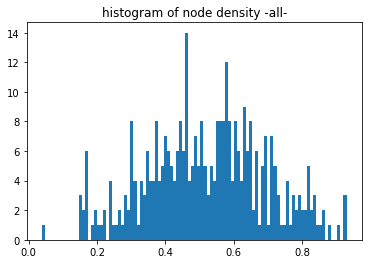

N =  400


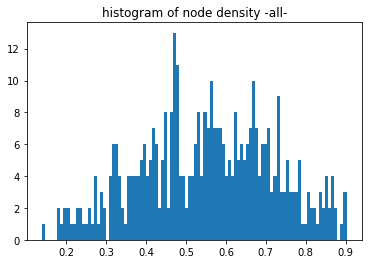

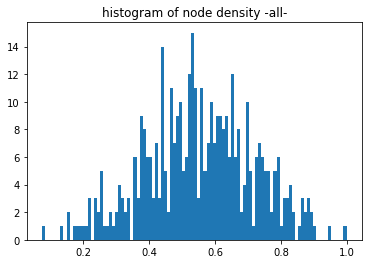

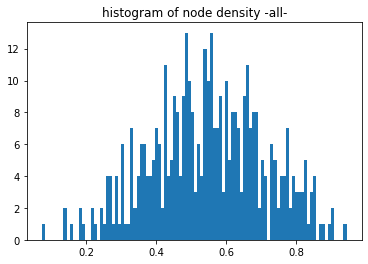

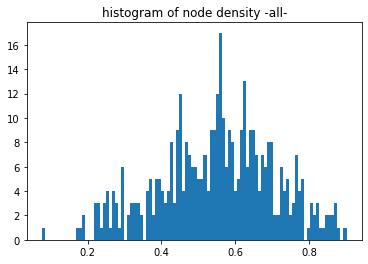

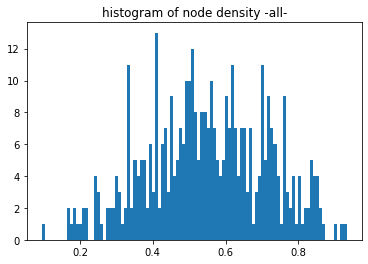

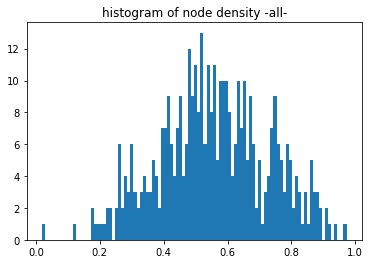

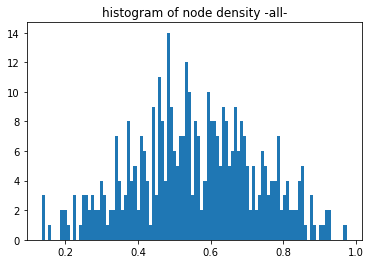

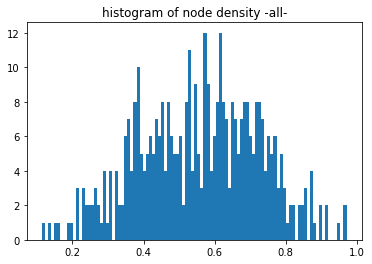

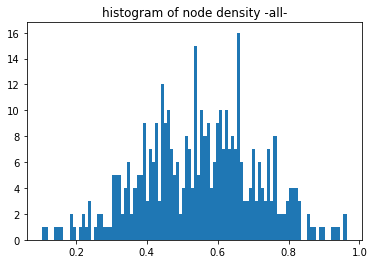

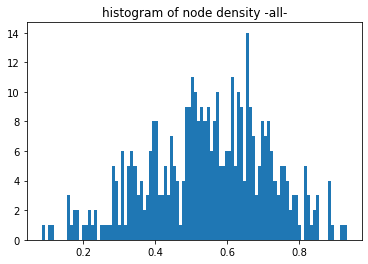

N =  450


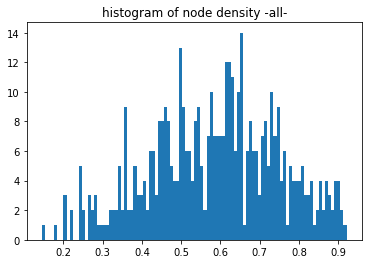

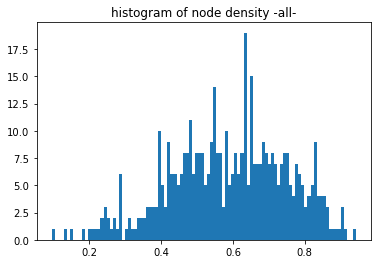

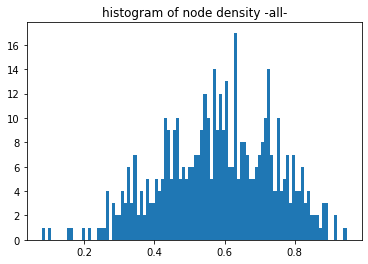

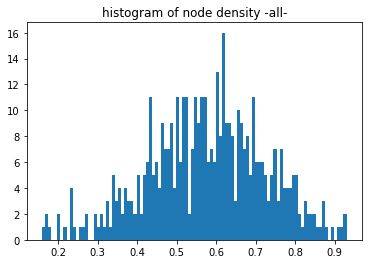

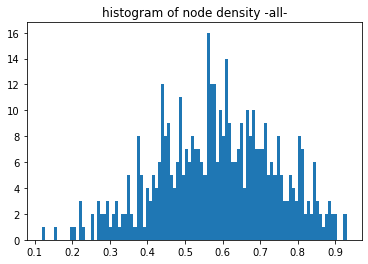

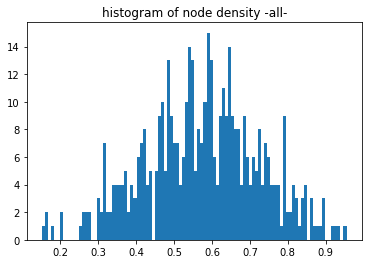

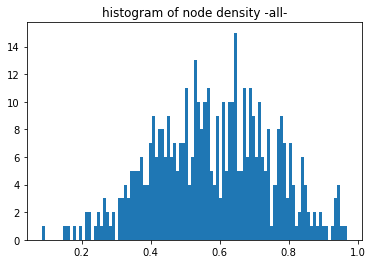

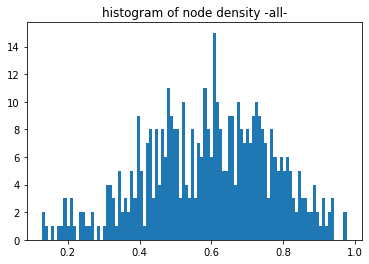

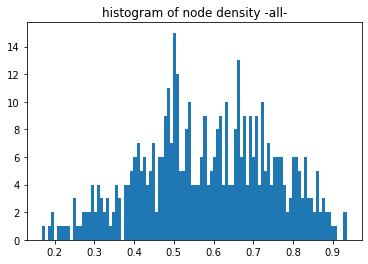

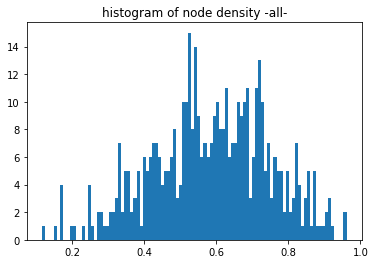

N =  500


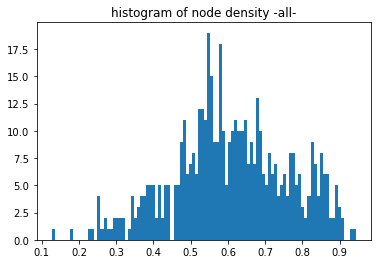

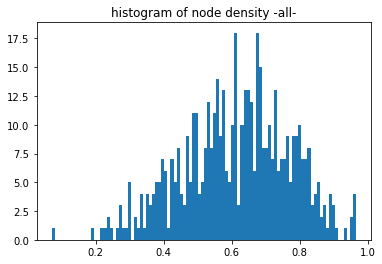

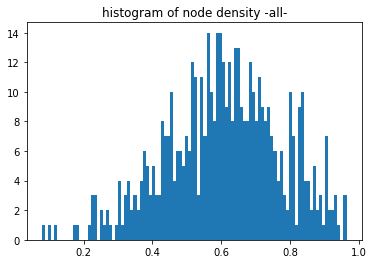

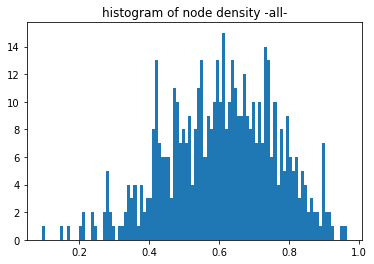

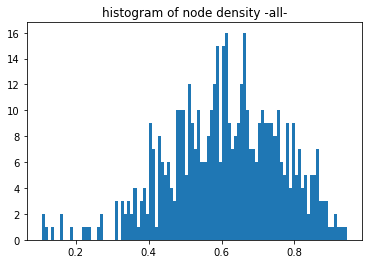

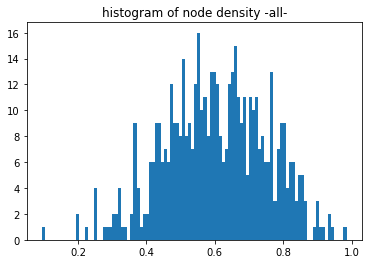

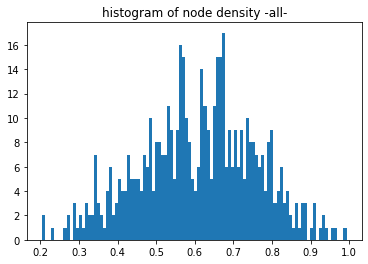

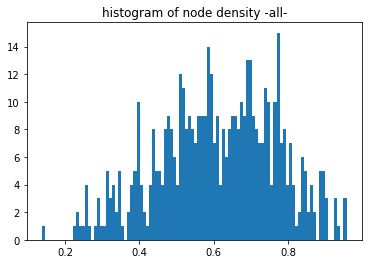

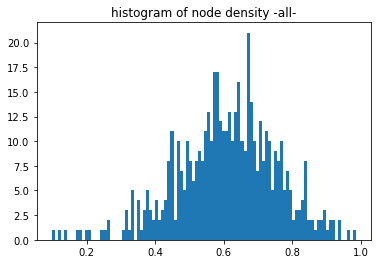

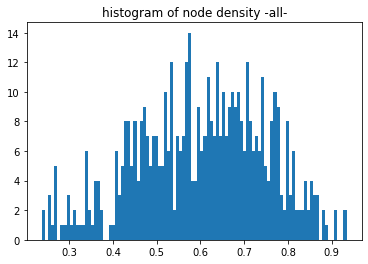

N =  550


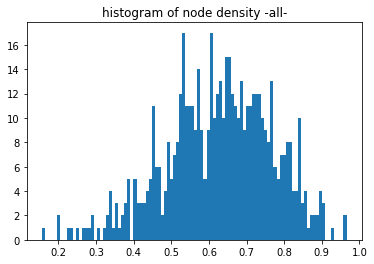

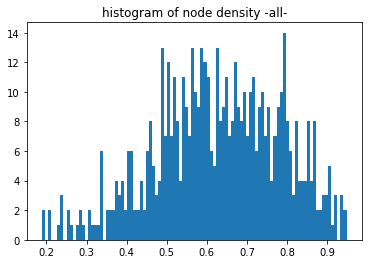

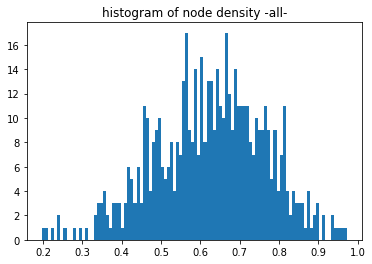

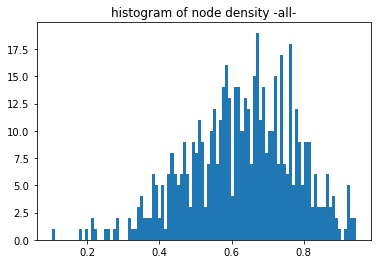

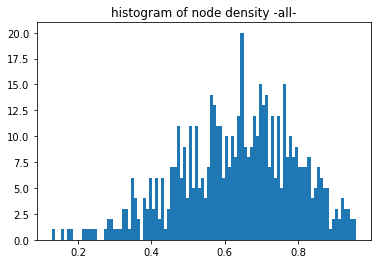

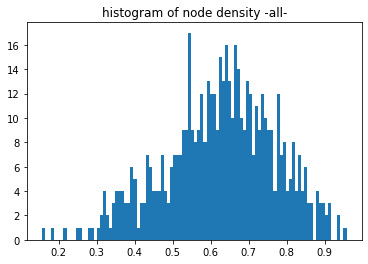

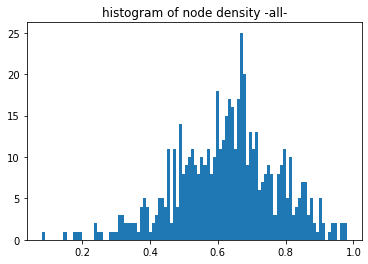

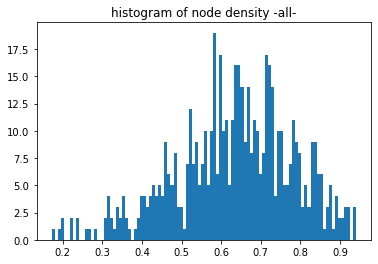

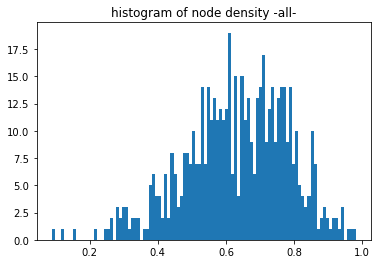

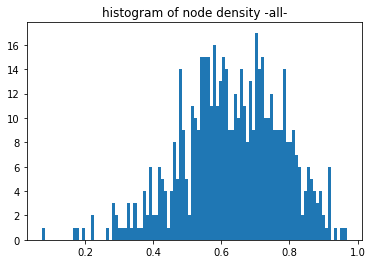

N =  600


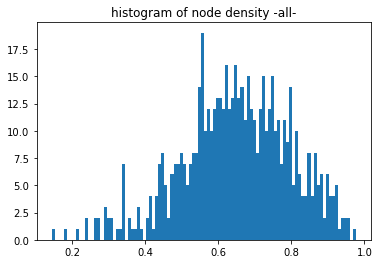

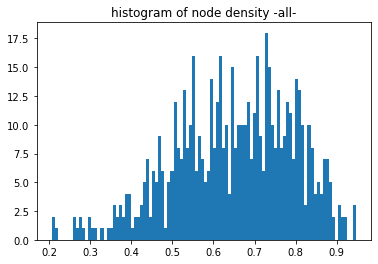

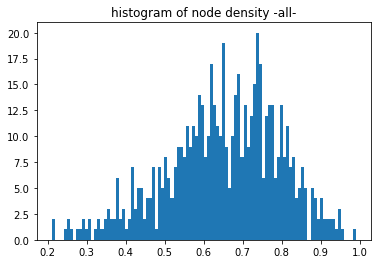

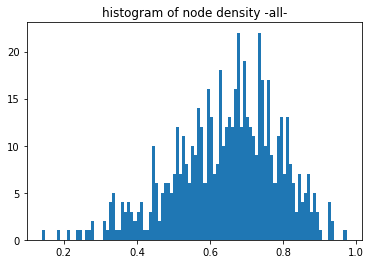

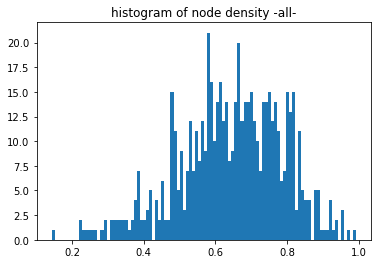

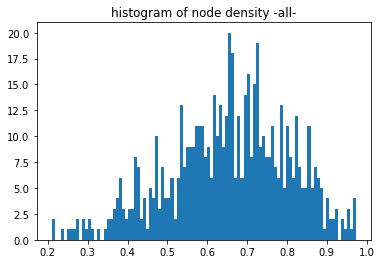

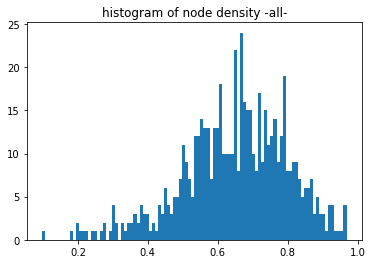

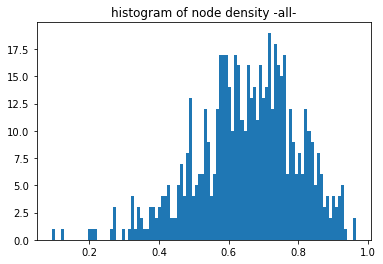

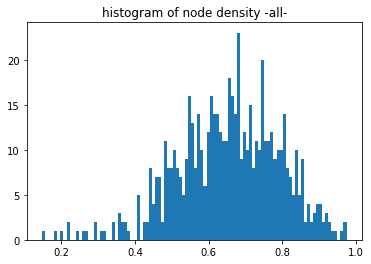

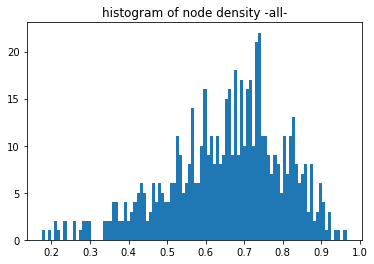

N =  650


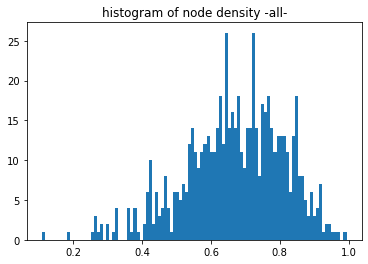

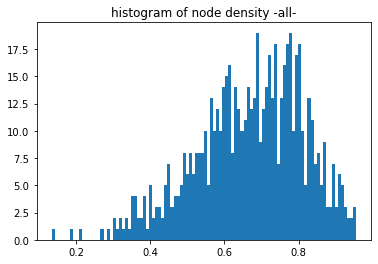

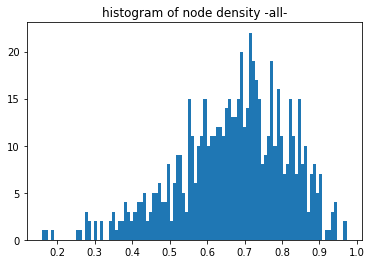

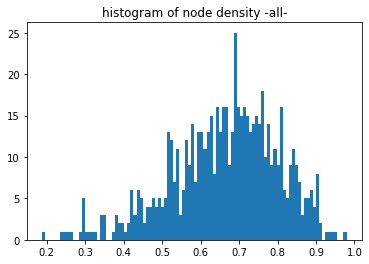

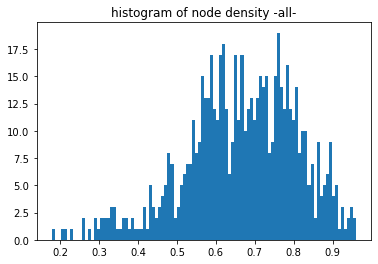

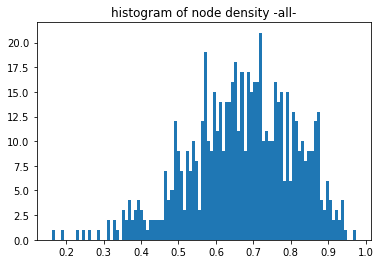

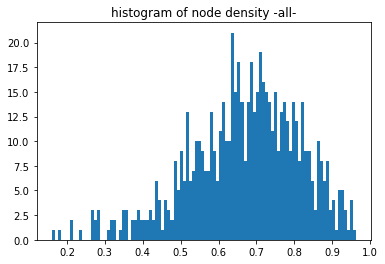

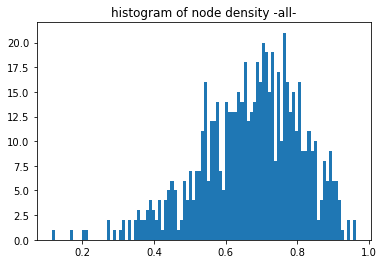

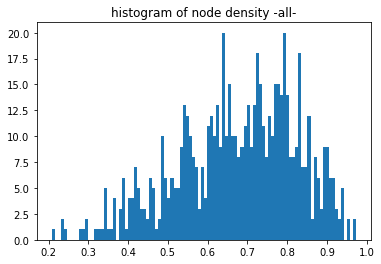

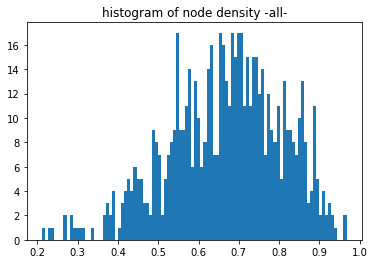

N =  700


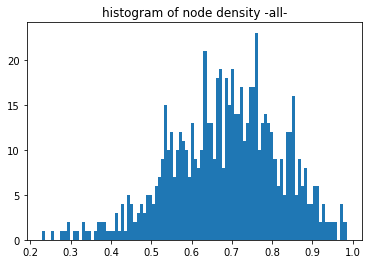

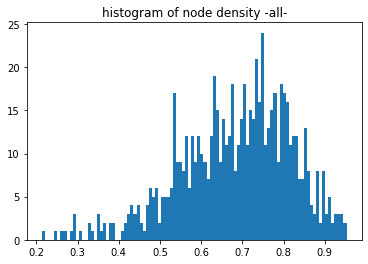

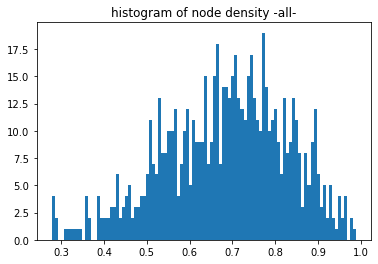

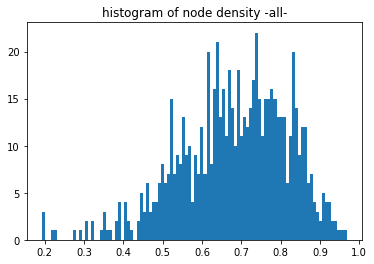

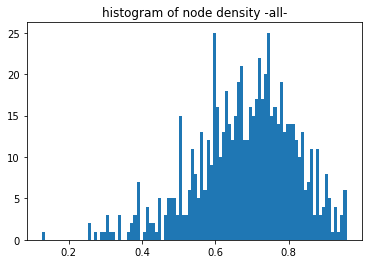

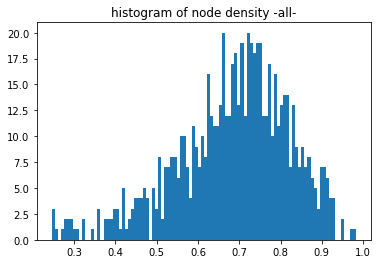

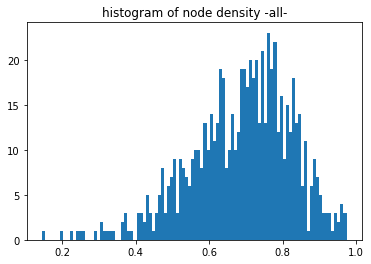

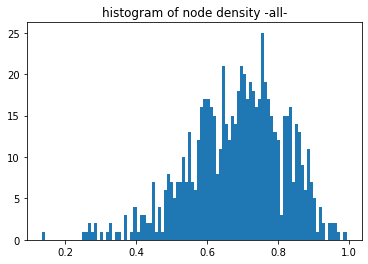

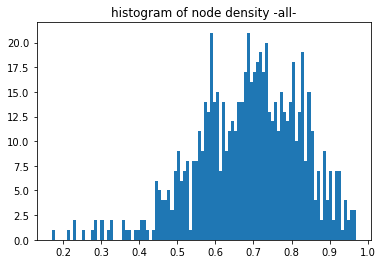

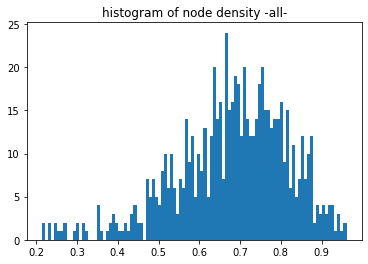

N =  750


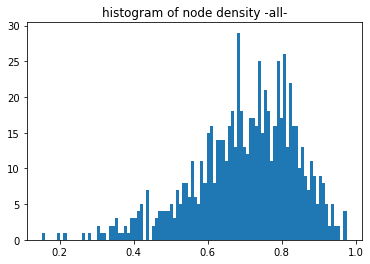

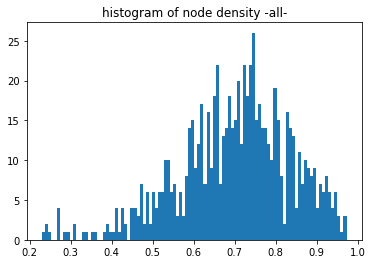

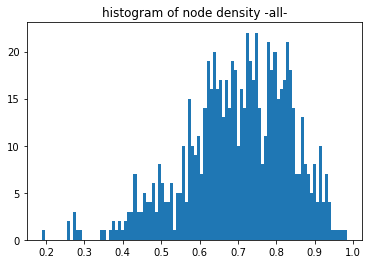

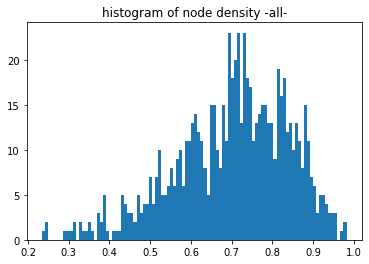

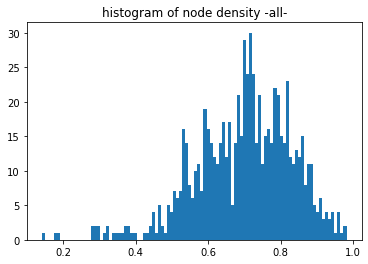

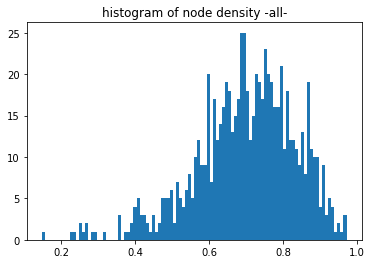

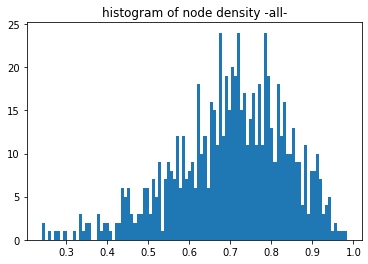

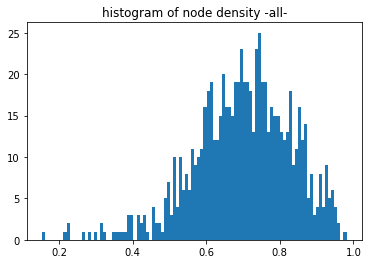

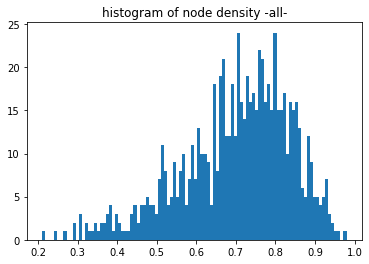

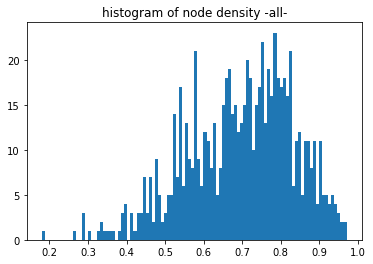

In [6]:
Sigma_s_s = [10, 55, 100]
Ns = np.arange(150, 751, 50).tolist()
#Ns = np.arange(1000, 2000, 200).tolist()

all_T_sd = []
all_T_av = []

for sigma_s in Sigma_s_s:
    print(sigma_s)
    T_N_sd = []
    T_N_av = []
    for N in Ns:
        print('N = ', N)
        Ts = []
        for i in range(10):
            T = compute_T(N, sigma_s, x_lim = [0,2], y_lim = [0,2])
            Ts.append(T)
        Ts    = np.asarray(Ts)
        T_std = np.std(Ts)
        T_avg = np.mean(Ts)

        T_N_sd.append(T_std)
        T_N_av.append(T_avg)
    all_T_sd.append(T_N_sd)
    all_T_av.append(T_N_av)
    

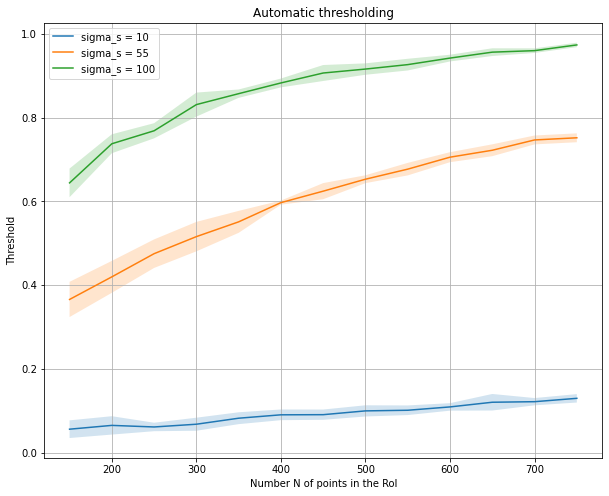

In [11]:

labels = ['sigma_s = ' + str(s) for s in Sigma_s_s]

x = Ns
plt.figure(figsize = (10,8))
for i, av in enumerate(all_T_av):
    av = np.asarray(av)
    sd = np.asarray(all_T_sd[i])
    plt.plot(x,av, label = labels[i])
    plt.fill_between(x, (av - sd), (av + sd), alpha=.2)

plt.title('Automatic thresholding')
plt.xlabel('Number N of points in the RoI')
plt.ylabel('Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
RoI_area = (2*2) *()

In [59]:
labels = ['sigma_s = ' + str(s) for s in Sigma_s_s]
print(labels)

['sigma_s = 30', 'sigma_s = 40', 'sigma_s = 50']


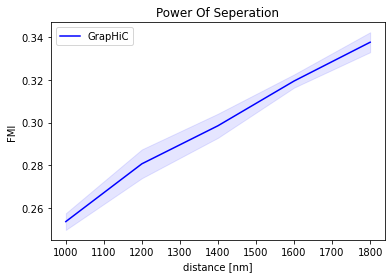

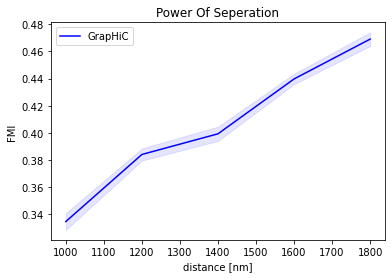

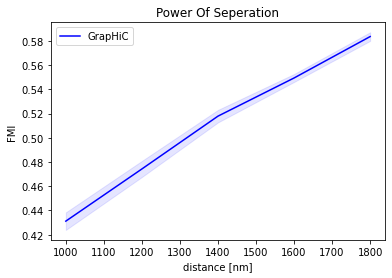

In [57]:
for i, T_av in enumerate(all_T_av):
    T_sd = all_T_sd[i]
    plot_with_error(Ns, T_av, T_sd, 4)

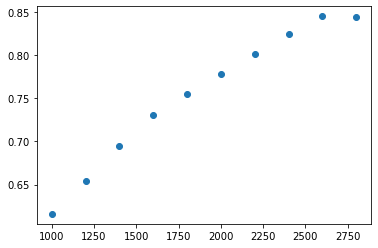

In [44]:
plt.scatter(Ns, Ts)

## Voir la limitation que Manley redoute: 

In [32]:
param = Standard_Param()
param.LocPerCluster = [12] * param.NumberOfClusters
param_NoNoise = Standard_Param()
param_NoNoise.LocPerCluster = [48] * param.NumberOfClusters
param_NoNoise.NoisePercentage = 0

In [33]:
DataNoise = Call_DataGenerator(param)

DataNoNoise = Call_DataGenerator(param_NoNoise)

In [34]:
Noise_df = DataNoise.GetAllData()
N_Noise = len(DataNoise.GetPoints())
NoNoise_df = DataNoNoise.GetAllData()
N_NoNoise = len(DataNoNoise.GetPoints())
sigma_s = 40.0

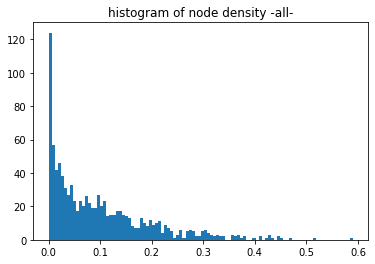

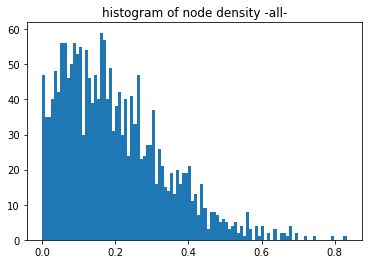

In [35]:
T_Noise = compute_T(N_Noise, sigma_s)
T_NoNoise = compute_T(N_NoNoise, sigma_s)

In [36]:
print('T_noise = ', T_Noise)
print('T_NoNoise = ', T_NoNoise)

T_noise =  0.29118704025157094
T_NoNoise =  0.47641982550005446


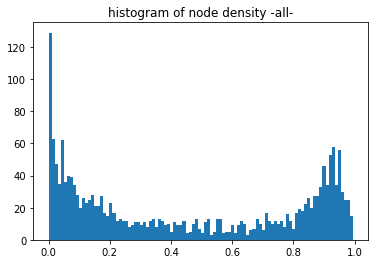

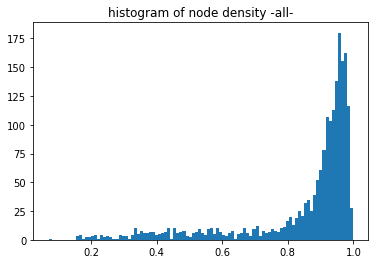

In [30]:
P_Noise = Noise_df[['x', 'y']].to_numpy()
P_NoNoise = NoNoise_df[['x', 'y']].to_numpy()

Sigma1          = np.ones((P_Noise.shape[0], 2, 2)) * 0
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P_Noise.shape[0], 1)).ravel()

density_Noise, G0 = see_histogram(P_Noise, Sigma1, sigma_s)

Sigma1          = np.ones((P_NoNoise.shape[0], 2, 2)) * 0
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P_NoNoise.shape[0], 1)).ravel()

density_NoNoise, G0 = see_histogram(P_NoNoise, Sigma1, sigma_s)



T_Noise =  0.29118704025157094
T_NoNoise =  0.47641982550005446


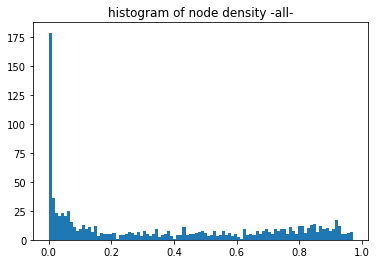

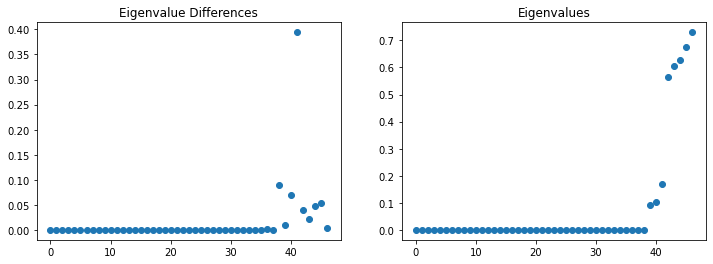

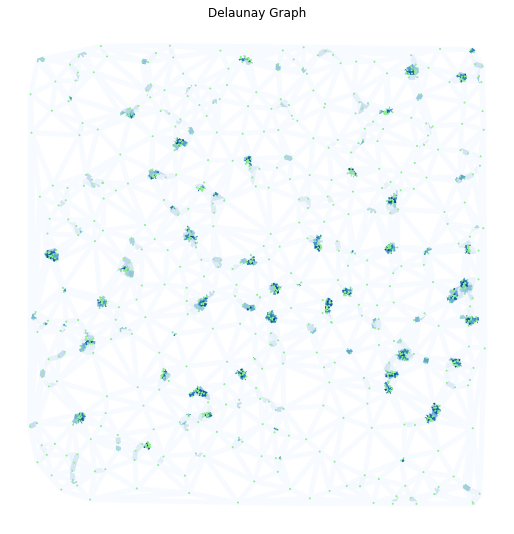

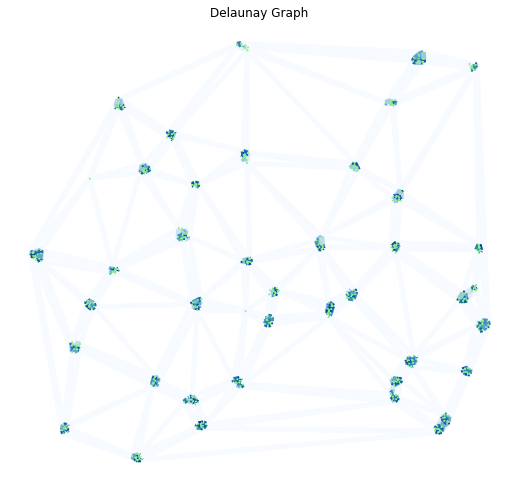

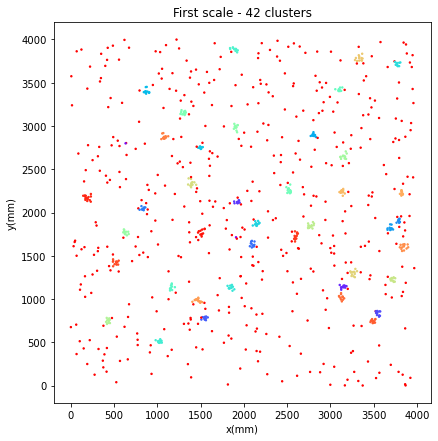

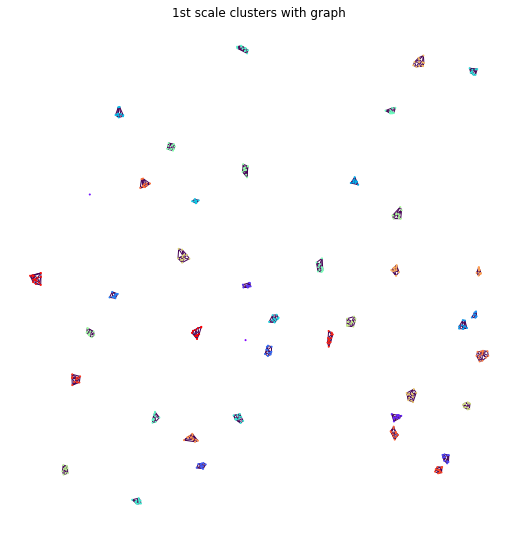

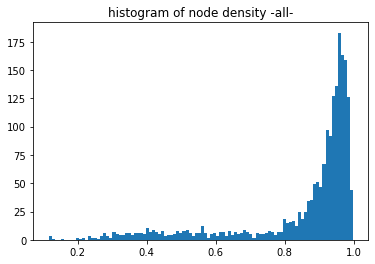

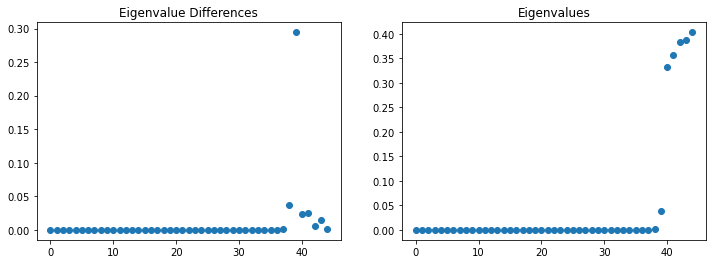

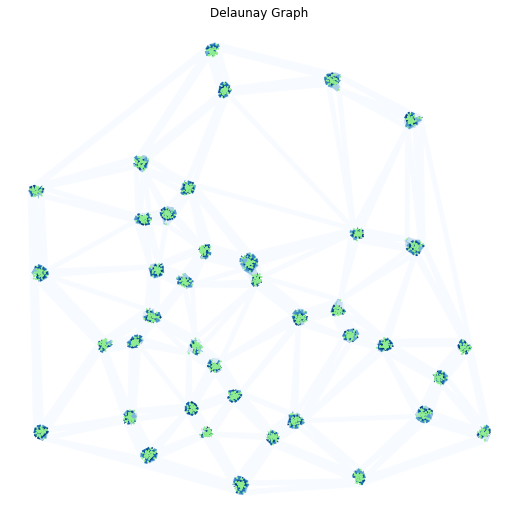

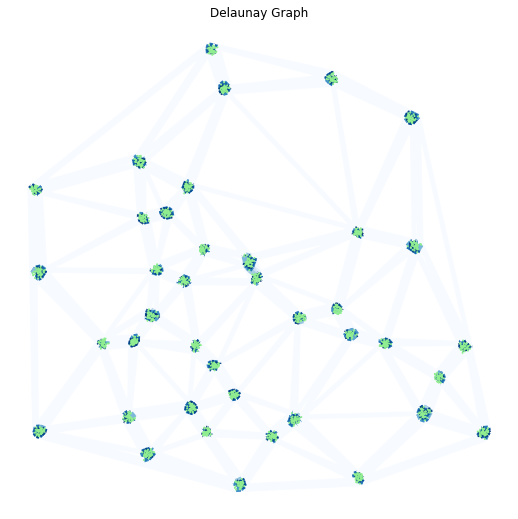

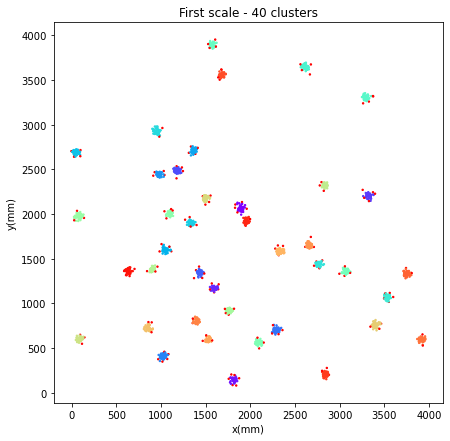

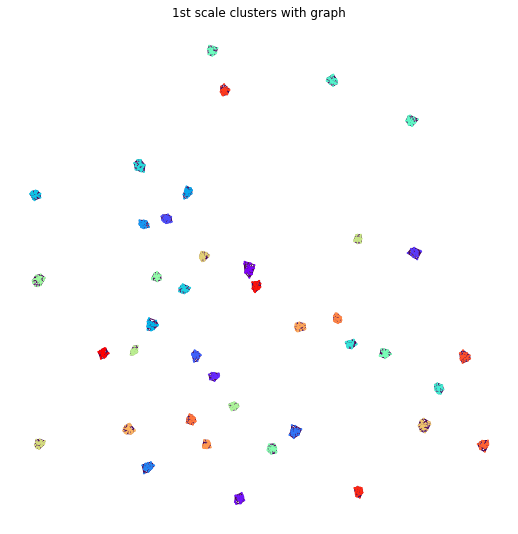

In [37]:
print('T_Noise = ', T_Noise)
print('T_NoNoise = ', T_NoNoise)
labels_Noise = calling_graphic(Noise_df, sigma_s, T_Noise)
labels_Noise = calling_graphic(NoNoise_df, sigma_s, T_NoNoise)

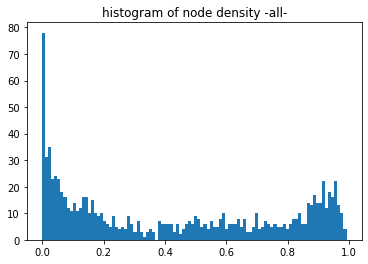

In [86]:
data_cluster = datagen.GetAllData()
P = data_cluster[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
truelabels = data_cluster['labels_1'].to_numpy()

Sigma1          = np.ones((P.shape[0], 2, 2)) * 0.5
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P.shape[0], 1)).ravel()

density1, G0 = see_histogram(P, Sigma1, sigma_s)

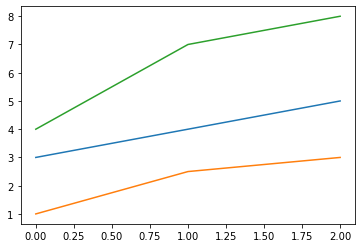

In [48]:
l1 = [3,4,5]
l2 = [1,2.5,3]
l3 = [4,7,8]
L = [l1, l2, l3]

x = [0,1,2]

for l in L: 
    plt.plot(x,l)
plt.show()

In [ ]:
def plot_with_error(distances, y_avg, y_std, NumberOfSim = 30,
                    title = 'Power Of Seperation',
                    xlabel = 'distance [nm]',
                    ylabel = 'FMI'):
    x = distances
    y_avg = np.asarray(y_avg)
    y_std = np.asarray(y_std) / np.sqrt(NumberOfSim) 
    plt.plot(x,y_avg, color ='b', label='GrapHiC')
    plt.fill_between(x, (y_avg - y_std), (y_avg + y_std), color='b', alpha=.1)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()